<a href="https://colab.research.google.com/github/msalvati1997/mushrooms_classificator/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrooooms : analisi della commestibilità dei funghi



Lo scopo del progetto è quello di predire se dato un fungo sconosciuto, esso sia commestibile o meno, sulla base dell'integrazione di diverse funzionalità di Machine learning offerte da librerie software.

Il dataset utilizzato è Mushrooms 2 UCI, della Philipps-University (Marburg, Germania), ed include 61069 ipotetici funghi con cappello basati su 173 specie (353 funghi per specie).
Ogni fungo è identificato come commestibile, velenoso, o di
commestibilità sconosciuta e sconsigliata (quest'ultima classe è combinata con la classe velenosa).

I funghi appartenenti al suddetto dataset sono stati ottenuti a partire da un dataset primario contenente informazioni su alcuni funghi descritti all'interno di un'enciclopedia.

Seguono gli attributi del dataset.


Feature | Meaning
------ | ------
cap-diameter (m)| float number in cm
cap-shape (n)| bell=b, conical=c, convex=x, flat=f, sunken=s,spherical=p, others=o
cap-surface (n)| fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h,leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e
cap-color (n)| brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l,orange=o, black=k
does-bruise-or-bleed (n)| bruises-or-bleeding=t,no=f
gill-attachment (n)| adnate=a, adnexed=x, decurrent=d, free=e,sinuate=s, pores=p, none=f, unknown=?
gill-spacing (n)|close=c, distant=d, none=f
gill-color (n)| see cap-color + none=f
stem-height (m)| float number in cm
stem-width (m)| float number in mm
stem-root (n)| bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
stem-surface (n)| see cap-surface + none=f
stem-color (n)| see cap-color + none=f
veil-type (n)| partial=p, universal=u
veil-color (n)| see cap-color + none=f
has-ring (n)| ring=t, none=f
ring-type (n)| cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l,pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
spore-print-color (n)| see cap color
habitat (n)| grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u,waste=w, woods=d
season (n)| spring=s, summer=u, autumn=a, winter=w



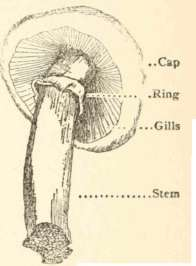

***Struttura del fungo***

## 1 Analisi dei dati


### 1.1 Importazione delle librerie

In [95]:
import os
import warnings
import itertools
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import KFold
import sklearn.metrics as mt
import scipy.stats as ss
from keras import models
from sklearn.svm import SVC
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler, label_binarize
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, classification_report, confusion_matrix, roc_curve, cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1.2 Importazione del dataset


Iniziamo con l'importare il CSV del dataset da GitHub. 

In [96]:
df = pd.read_csv("https://raw.githubusercontent.com/msalvati1997/mushrooms_classificator/main/secondary_data.csv") 

In [97]:
print("Dimensionalità del dataset:")
print("# Istanze :", df.shape[0])
print("# Attributi :", df.shape[1]-1)
print("Feature Target : class")

Dimensionalità del dataset:
# Istanze : 61069
# Attributi : 20
Feature Target : class


#### 1.2.1 Cleaning del dataset

##### 1.2.1.2 Gestione dei valori mancanti

Una volta importato il dataset, ci siamo accorti della mancanza di alcuni valori. Gestire i valori mancanti è importante ai fini dell'apprendimento, quindi abbiamo provveduto a riempire tali spazi con dei caratteri '-' 

In [98]:
null_table= pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
null_table.columns=['null ratio']
null_table

,null ratio
veil-type,0.947977
spore-print-color,0.895954
veil-color,0.878613
stem-root,0.843931
stem-surface,0.624277
gill-spacing,0.410405
cap-surface,0.231214
gill-attachment,0.161850
ring-type,0.040462
class,0.000000


Effettuiamo la sostituzione dei valori mancanti.

In [99]:
df.fillna('')
for col in df.columns:
   df[col]= df[col].replace('','-')
   df[col]= df[col].replace(np.nan,'-')

In [100]:
null_table= pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
null_table.columns=['null ratio']
null_table

,null ratio
class,0.0
stem-root,0.0
habitat,0.0
spore-print-color,0.0
ring-type,0.0
has-ring,0.0
veil-color,0.0
veil-type,0.0
stem-color,0.0
stem-surface,0.0


Il dataset ora risulta non avere valori mancanti.

##### 1.2.1.2 Conversione target

Il target è presente nella forma di variabile categorica (e=edible, p=poisonous). Per facilitare la fase di apprendimento, abbiamo convertito la variabile in (1=edible, 0=poisonous).

In [101]:
print("before conversion")
print("Class values : ",df['class'].unique())
df['class'] = df['class'].replace('p',1)
df['class'] = df['class'].replace('e',0)
print("after conversion")
print("Class values : ",df['class'].unique())

before conversion
Class values :  ['p' 'e']
after conversion
Class values :  [1 0]


##### 1.2.1.3 Label encoder

Alcune implementazioni di algoritmi di apprendimento automatico richiedono che tutti i dati siano numerici. Ad esempio, scikit-learn ha questo requisito.

Ciò significa che i dati categorici devono essere convertiti in una forma numerica.

In [102]:
labelencoder=LabelEncoder()
for column in df.columns:
    if column!= 'class' and column!='stem-height' and column!='stem-width' and column!='cap-diameter':
     df[column] = labelencoder.fit_transform(df[column])

### 1.3 Dataset 

In [103]:
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,6,3,6,0,3,0,10,16.95,...,5,8,11,1,5,1,3,0,0,3
1,1,16.60,6,3,6,0,3,0,10,17.99,...,5,8,11,1,5,1,3,0,0,2
2,1,14.07,6,3,6,0,3,0,10,17.80,...,5,8,11,1,5,1,3,0,0,3
3,1,14.17,2,4,1,0,3,0,10,15.77,...,5,8,11,1,5,1,6,0,0,3
4,1,14.64,6,4,6,0,3,0,10,16.53,...,5,8,11,1,5,1,6,0,0,3
5,1,15.34,6,3,6,0,3,0,10,17.84,...,5,8,11,1,5,1,6,0,0,2
6,1,14.85,2,4,6,0,3,0,10,17.71,...,5,8,11,1,5,1,3,0,0,3
7,1,14.86,6,4,1,0,3,0,10,17.03,...,5,8,11,1,5,1,6,0,0,2
8,1,12.85,2,3,6,0,3,0,10,17.27,...,5,8,11,1,5,1,6,0,0,0
9,1,13.55,2,3,1,0,3,0,10,16.04,...,5,8,11,1,5,1,6,0,0,3


In [104]:
df.describe()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,...,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,0.554913,6.733854,4.041641,4.984100,6.144541,0.173410,2.948141,0.832370,7.338502,6.581538,...,0.479769,2.060964,8.429072,0.052023,0.563396,0.248555,2.369074,0.380439,0.623721,1.053300
std,0.496979,5.264845,2.138630,3.966123,3.171077,0.378605,2.383064,0.860638,3.186426,3.370017,...,1.301808,2.934895,3.218516,0.222075,1.558891,0.432179,1.544033,1.278864,1.265880,1.100575
min,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.480000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,5.000000,4.640000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,5.860000,5.000000,4.000000,5.000000,0.000000,2.000000,1.000000,7.000000,5.950000,...,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
75%,1.000000,8.540000,6.000000,9.000000,10.000000,0.000000,5.000000,1.000000,10.000000,7.740000,...,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,1.000000,62.340000,6.000000,11.000000,11.000000,1.000000,7.000000,3.000000,11.000000,33.920000,...,5.000000,8.000000,12.000000,1.000000,6.000000,1.000000,8.000000,7.000000,7.000000,3.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  int64  
 7   gill-spacing          61069 non-null  int64  
 8   gill-color            61069 non-null  int64  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  int64  
 12  stem-surface          61069 non-null  int64  
 13  stem-color            61069 non-null  int64  
 14  veil-type             61069 non-null  int64  
 15  veil-color         

### 1.4 Bilanciamento

Verifichiamo ora che il dataset sia bilanciato.

Qualora non lo fosse potremmo applicare metodi di ricampionamento come oversampling o undersampling.

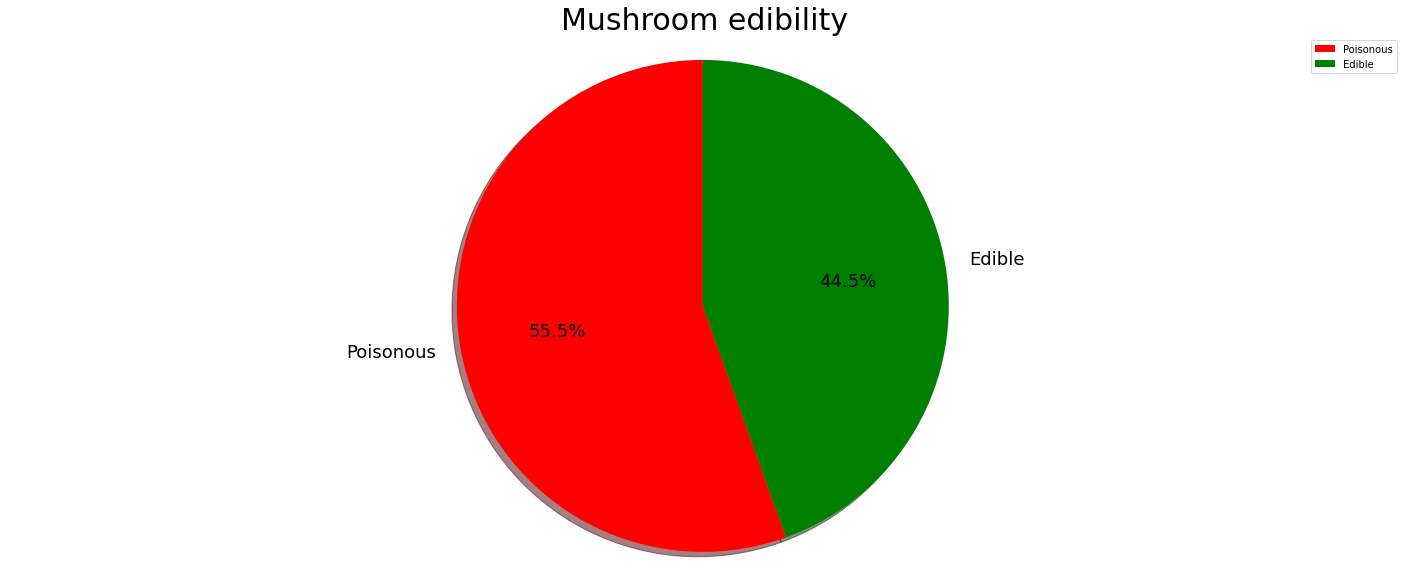

In [106]:
col = ['red','green']
lab = ['Poisonous','Edible']
valori = df['class'].value_counts()/df['class'].shape[0]

fig1, ax1 = plt.subplots(figsize=(25,10))
ax1.pie(valori, labels=lab , colors = col, autopct='%1.1f%%', textprops={'fontsize': 18},
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(lab)
ax1.set_title('Mushroom edibility', size=30)


fig1.show()

Vista e considerata la similarità delle percentuali, il dataset risulta essere bilanciato.

### 1.5 Correlazione

Verifichiamo a questo punto la correlazione tra i diversi attributi utilizzando la matrice di correlazione.

#### 1.5.1 Correlazione features 

Per la correlazione delle variabili numeriche è stato usato il coefficente di correlazione di Pearson (dal nome di Karl Pearson). 

Esso può essere utilizzato per riassumere la forza della relazione lineare tra due campioni di dati, ed è calcolato come la covarianza tra due variabili divisa per il prodotto della deviazione standard di ciascun campione di dati.

L'uso della media e della deviazione standard nel calcolo suggerisce la necessità che i campioni di dati abbiano una distribuzione gaussiana o di tipo gaussiano.

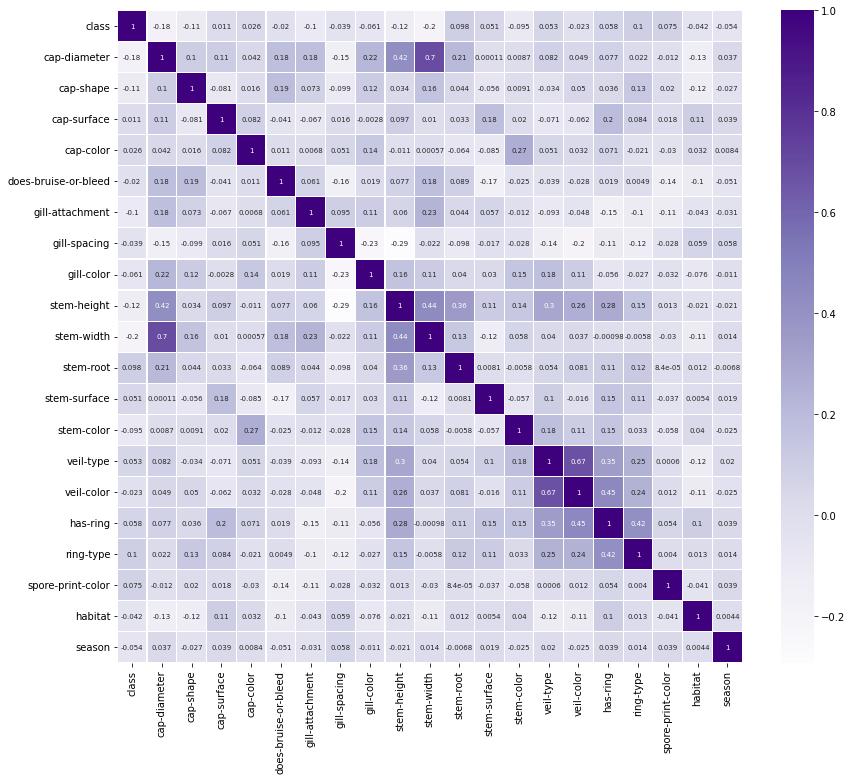

In [107]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

Ai fini della classificazione, le features più rilevanti per la classe target sembrano:
- cap-diameter (-0,18)
- stem-width (-0,2)

Tuttavia, non sembrano esserci valori con una correlazione rilevante rispetto alla velenosità di un fungo. In generale sembra che le feature numeriche siano leggermente più legate al target.

Procediamo ora con lo studio del Violin Plot, un metodo per visualizzare la distribuzione di dati numerici di diverse variabili.

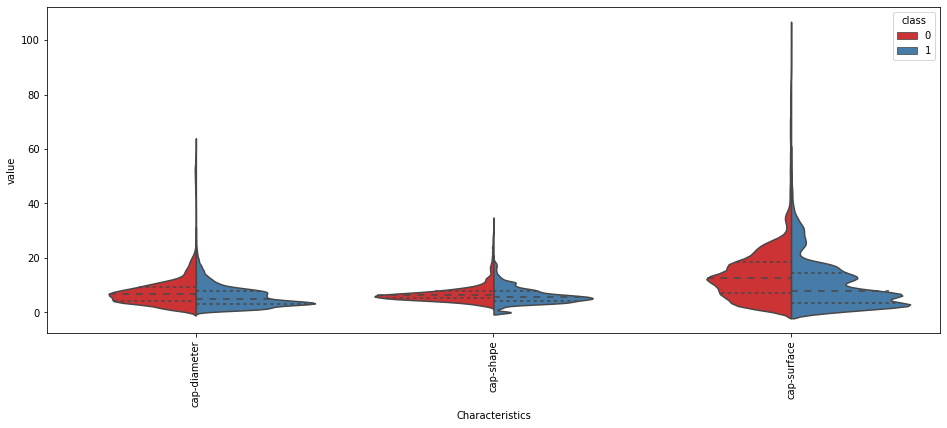

In [108]:
df_div = pd.melt(df[['cap-diameter','stem-height','stem-width','class']], "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

Le distribuzioni delle feature numeriche sono addensate tra i valori 0 e 20. La classe target sembra essere equamente distribuita tra le feature.

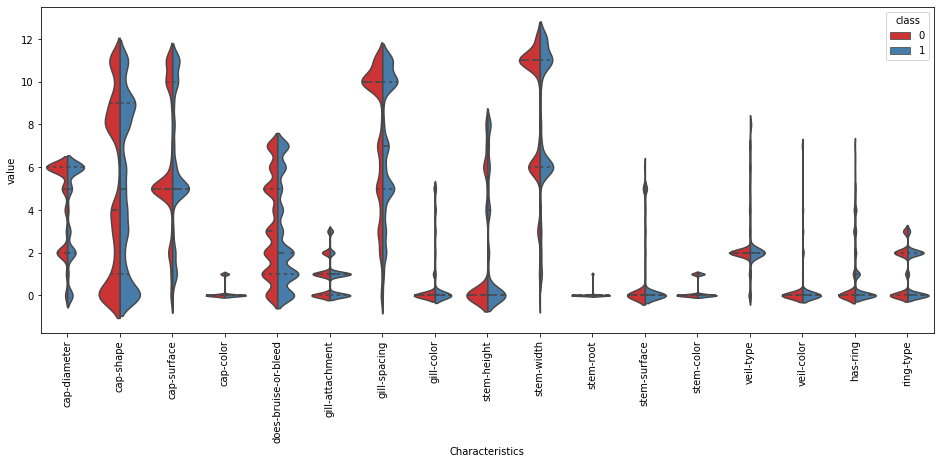

In [109]:
df_cat= df.drop(columns=['cap-diameter','stem-height','stem-width'])
df_div = pd.melt(df_cat, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

Anche qui notiamo il bilanciamento della distribuzione della classe target nelle feature categoriche.

Si nota purtroppo come non sia facile trovare un range di valori per una certa feature in cui si possa distinguere in maniera semplice la velenosità.

Vediamo ora come variano le distribuzioni delle features numeriche 

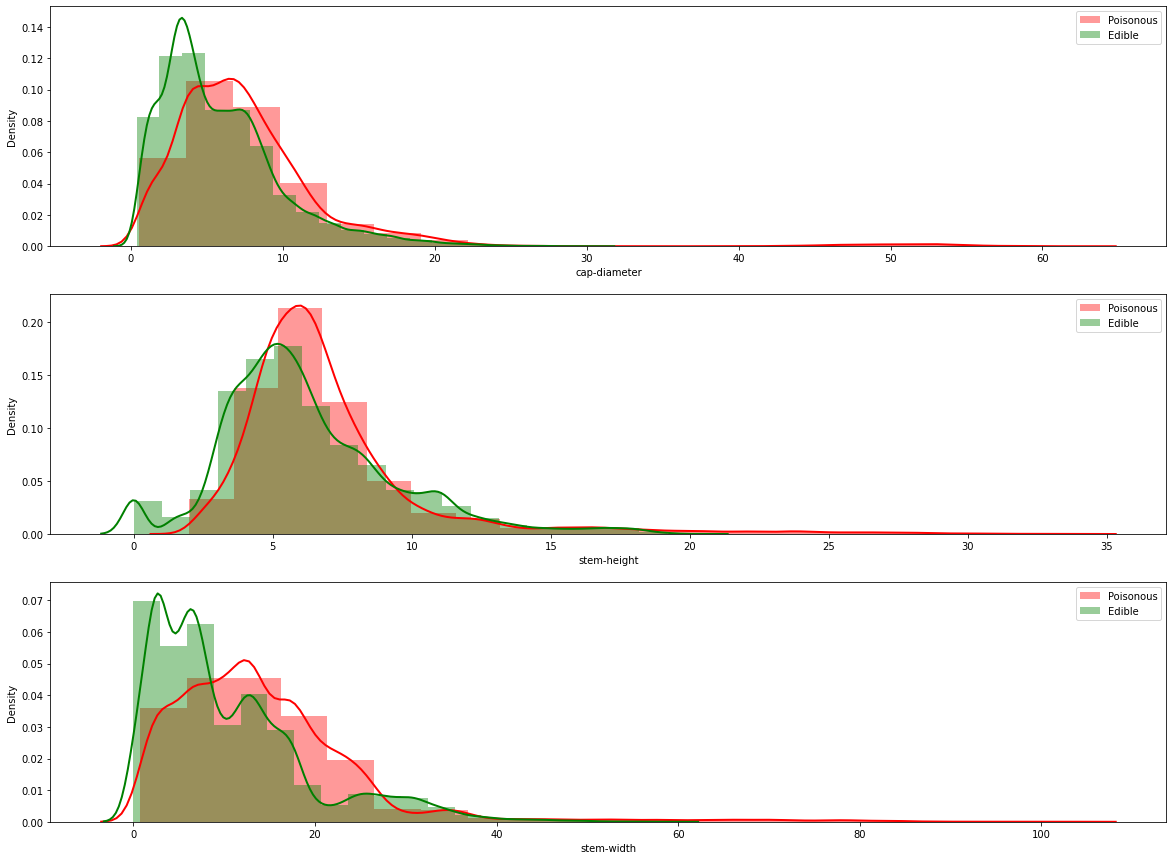

In [110]:
fig = plt.figure(figsize=(20,15))
index = 1
for col in ['cap-diameter','stem-height','stem-width']:
    fig.add_subplot(3,1,index)
    sns.distplot(df[df['class']==0][col].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='Poisonous', color='red')
    sns.distplot(df[df['class']==1][col].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='Edible', color='green')
    index += 1
    plt.legend()

plt.show()

Si evince come le features tendano ad avere una distribuzione gaussiana e a variare in maniera simile.



#### 1.5.2 Correlazione variabili categoriche

Il coefficente di Pearson non è definito quando le variabili sono categoriche. 

Non possiamo calcolare la correlazione nel caso di variabili categoriche, in quanto la correlazione in termini semplici è :
- se x aumenta, y aumenta, diminuisce o rimane lo stesso. 

Nel caso in cui abbiamo delle variabili categoriche (che non possono aumentare o diminuire), ne calcoliamo l'associazione.

Un'opzione comune per gestire questo scenario consiste nell'usare prima la codifica one-hot e suddividere ogni possibile opzione di ciascuna funzionalità categoriale in funzionalità 0 o 1. Ciò consentirà quindi l'uso della correlazione, ma può facilmente diventare troppo complesso da analizzare.

Quindi utilizziamo il V di Cramer. 
Si basa su una variazione nominale del test del χ² di Pearson.
- Analogamente alla correlazione, l'output è compreso nell'intervallo [0,1], dove 0 significa nessuna associazione e 1 è un'associazione completa. (A differenza della correlazione, non ci sono valori negativi, poiché non esiste un'associazione negativa. O c'è o non c'è)
- Come la correlazione, la V di Cramer è simmetrica — è insensibile allo scambio di x e y

Il χ² independence test  è una procedura per verificare se due variabili categoriche sono correlate in una certa popolazione.

In [111]:
''''
Cramér V: versione modificata
Questa funzione è una variazione dell'effettiva funzione V Cramér.
La V di Cramér può essere uno stimatore fortemente distorto della sua controparte della popolazione e tenderà a sovrastimare 
la forza dell'associazione. Viene utilizzata una correzione del bias.
'''
def cramers_v(col1, col2):
    covariance_matrix = pd.crosstab(col1,col2)
    chi2 = ss.chi2_contingency(covariance_matrix)[0]
    n = covariance_matrix.sum().sum()
    phi2 = chi2/n
    r,k = covariance_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [112]:
cols=list()
before=list()
for i in df.columns :
   if i != 'cap-diameter' and i!='stem-height' and i!='stem-width' and i!='class':
     before.append(df[i].unique())
     cols.append(i)

In [113]:
categorical_var = list(itertools.combinations(cols,2))

Vediamo ora quindi come, rispetto ad una threshold che rappresenta il nostro interesse (fissata a 0.6, ma impostabile in maniera differente), quali variabili categoriche siano più associate tra di loro.

In [114]:
row=list()
for pairs in categorical_var:
     data = list()
     value = cramers_v(df[pairs[0]], df[pairs[1]])
     data.append(pairs[0])
     data.append(pairs[1])
     data.append(value)
     row.append(data)

categorical_association = pd.DataFrame(row,columns = ['features1','features2','association']) 
categorical_association.drop_duplicates()

THRESHOLD = 0.6
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(categorical_association.loc[categorical_association['association'] >= THRESHOLD])

           features1     features2  association
58   gill-attachment  gill-spacing        0.638
115        veil-type    veil-color        0.715
117        veil-type     ring-type        0.731
126         has-ring     ring-type        0.891


Andiamo ora a studiare la relazione che c'è tra le variabili categoriche e la classe target. 

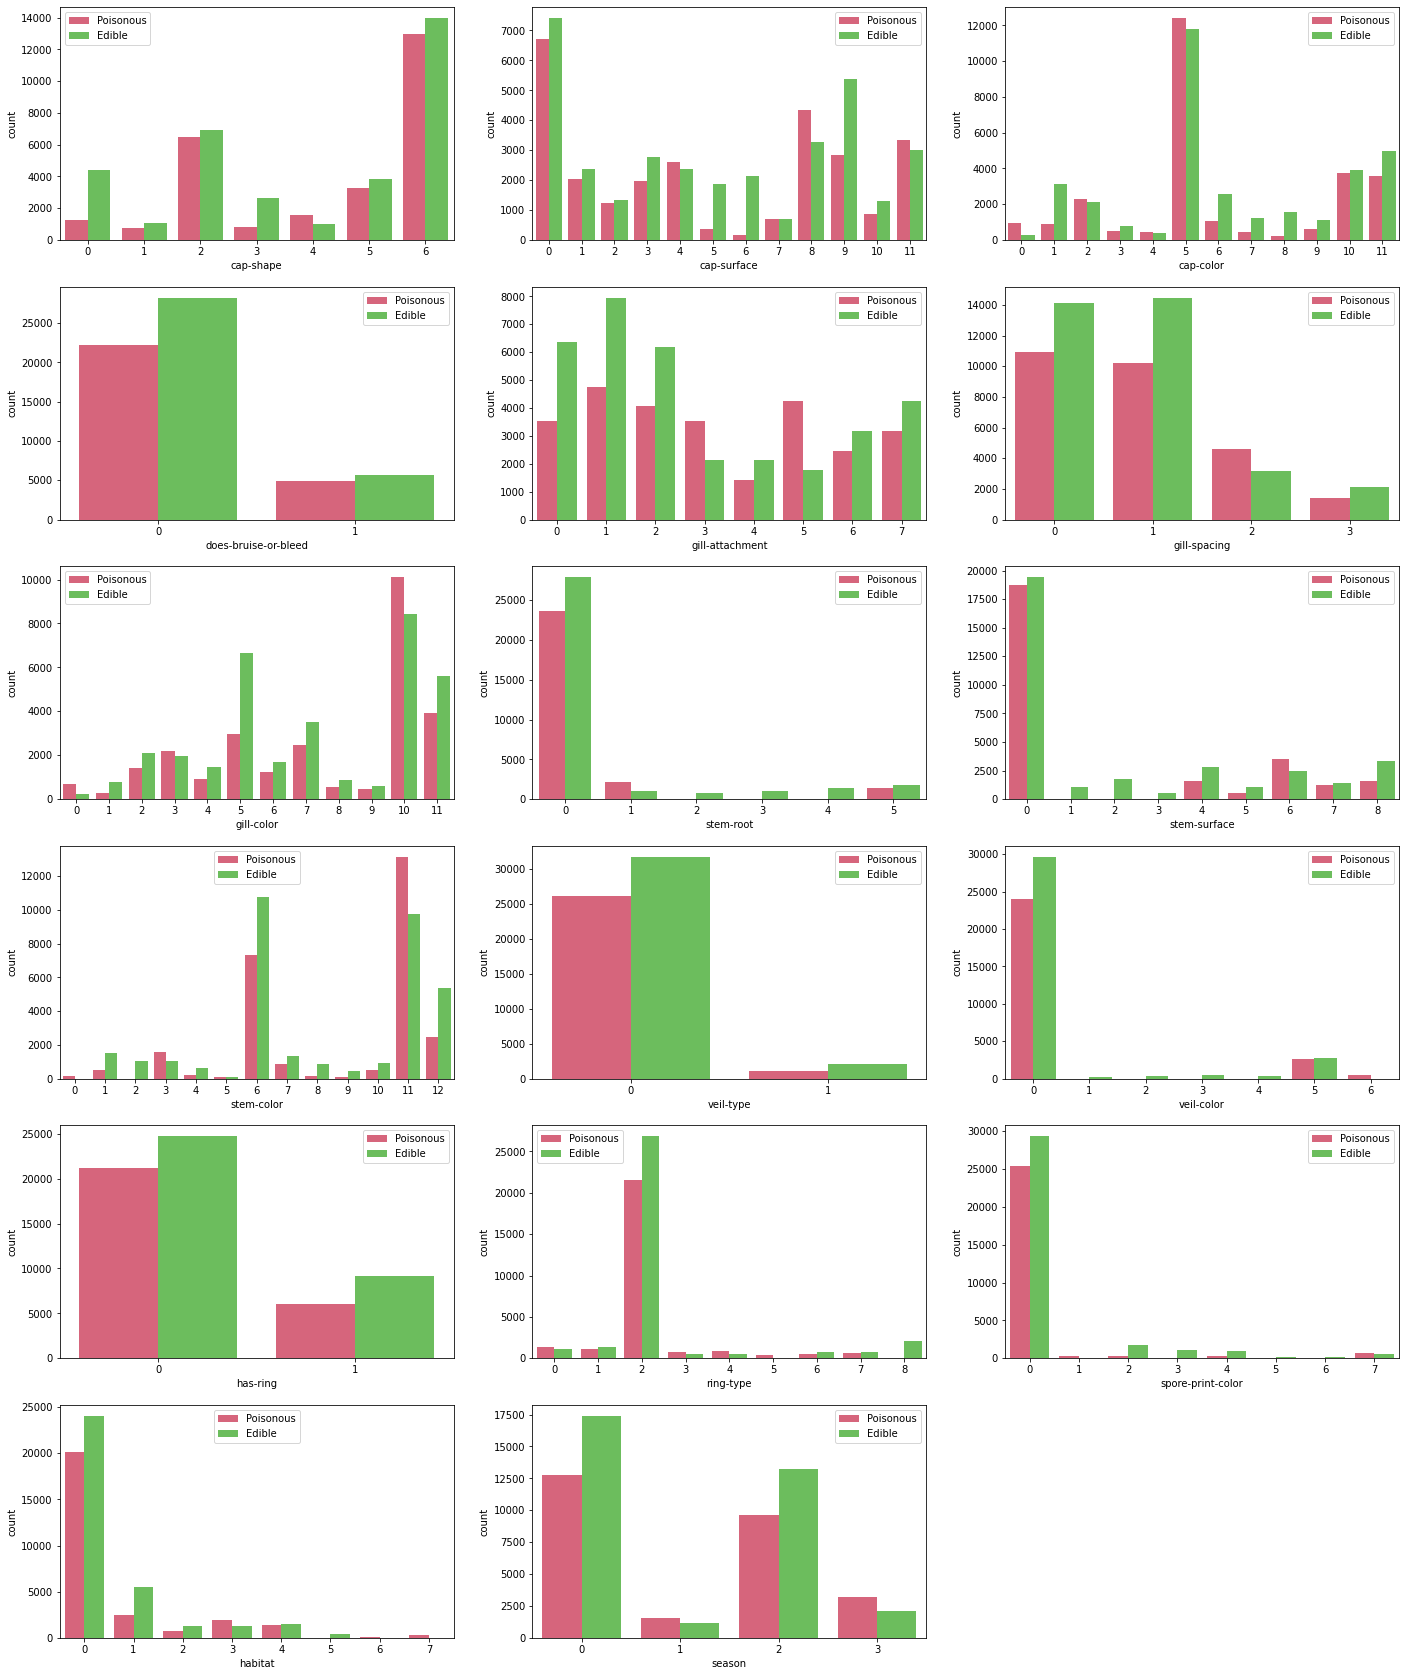

In [115]:
fig = plt.figure(figsize=(24, 30))
i = 1
for col in df.columns:
    if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width'  :
        fig.add_subplot(6,3,i)
        g = sns.countplot(x=col, data=df,hue='class', alpha=.7,palette= ["#E00934", "#1EB902"])
        plt.legend(['Poisonous','Edible'])
        i += 1
plt.show()

Tra classi categoriche, esattamente come già si vedeva dal Violin Plot, non sembrano esserci degli sbilanciamenti rilevanti per il target.
Eccezion fatta per alcuni valori di alcune variabili categoriche che tuttavia non si pronunciano in numerosità, quindi non rilevanti ai fini dello studio.

##### 1.5.2.1 Studio velenosità dei funghi a partire dalle features

La seguente funzione si occupa di calcolare la probabilità che un fungo sia velenoso a partire da un valore di un attributo passato come parametro

In [116]:
def cond_prob(feature):
    r = df[df[feature].notnull()][feature].unique()
    p = []
    for val in r:
        joint = df[(df[feature]==val) & (df['class']==1)].shape[0]
        pre = df[(df[feature]==val)].shape[0]
        post_1 = joint/pre
        p.append([val, post_1])
    return pd.DataFrame(p, columns=['Feature value','probability'])

Andiamo a vedere dei Bar Plot sulla probabilità che un fungo sia velenoso a partire dai diversi attributi che abbiamo a disposizione.

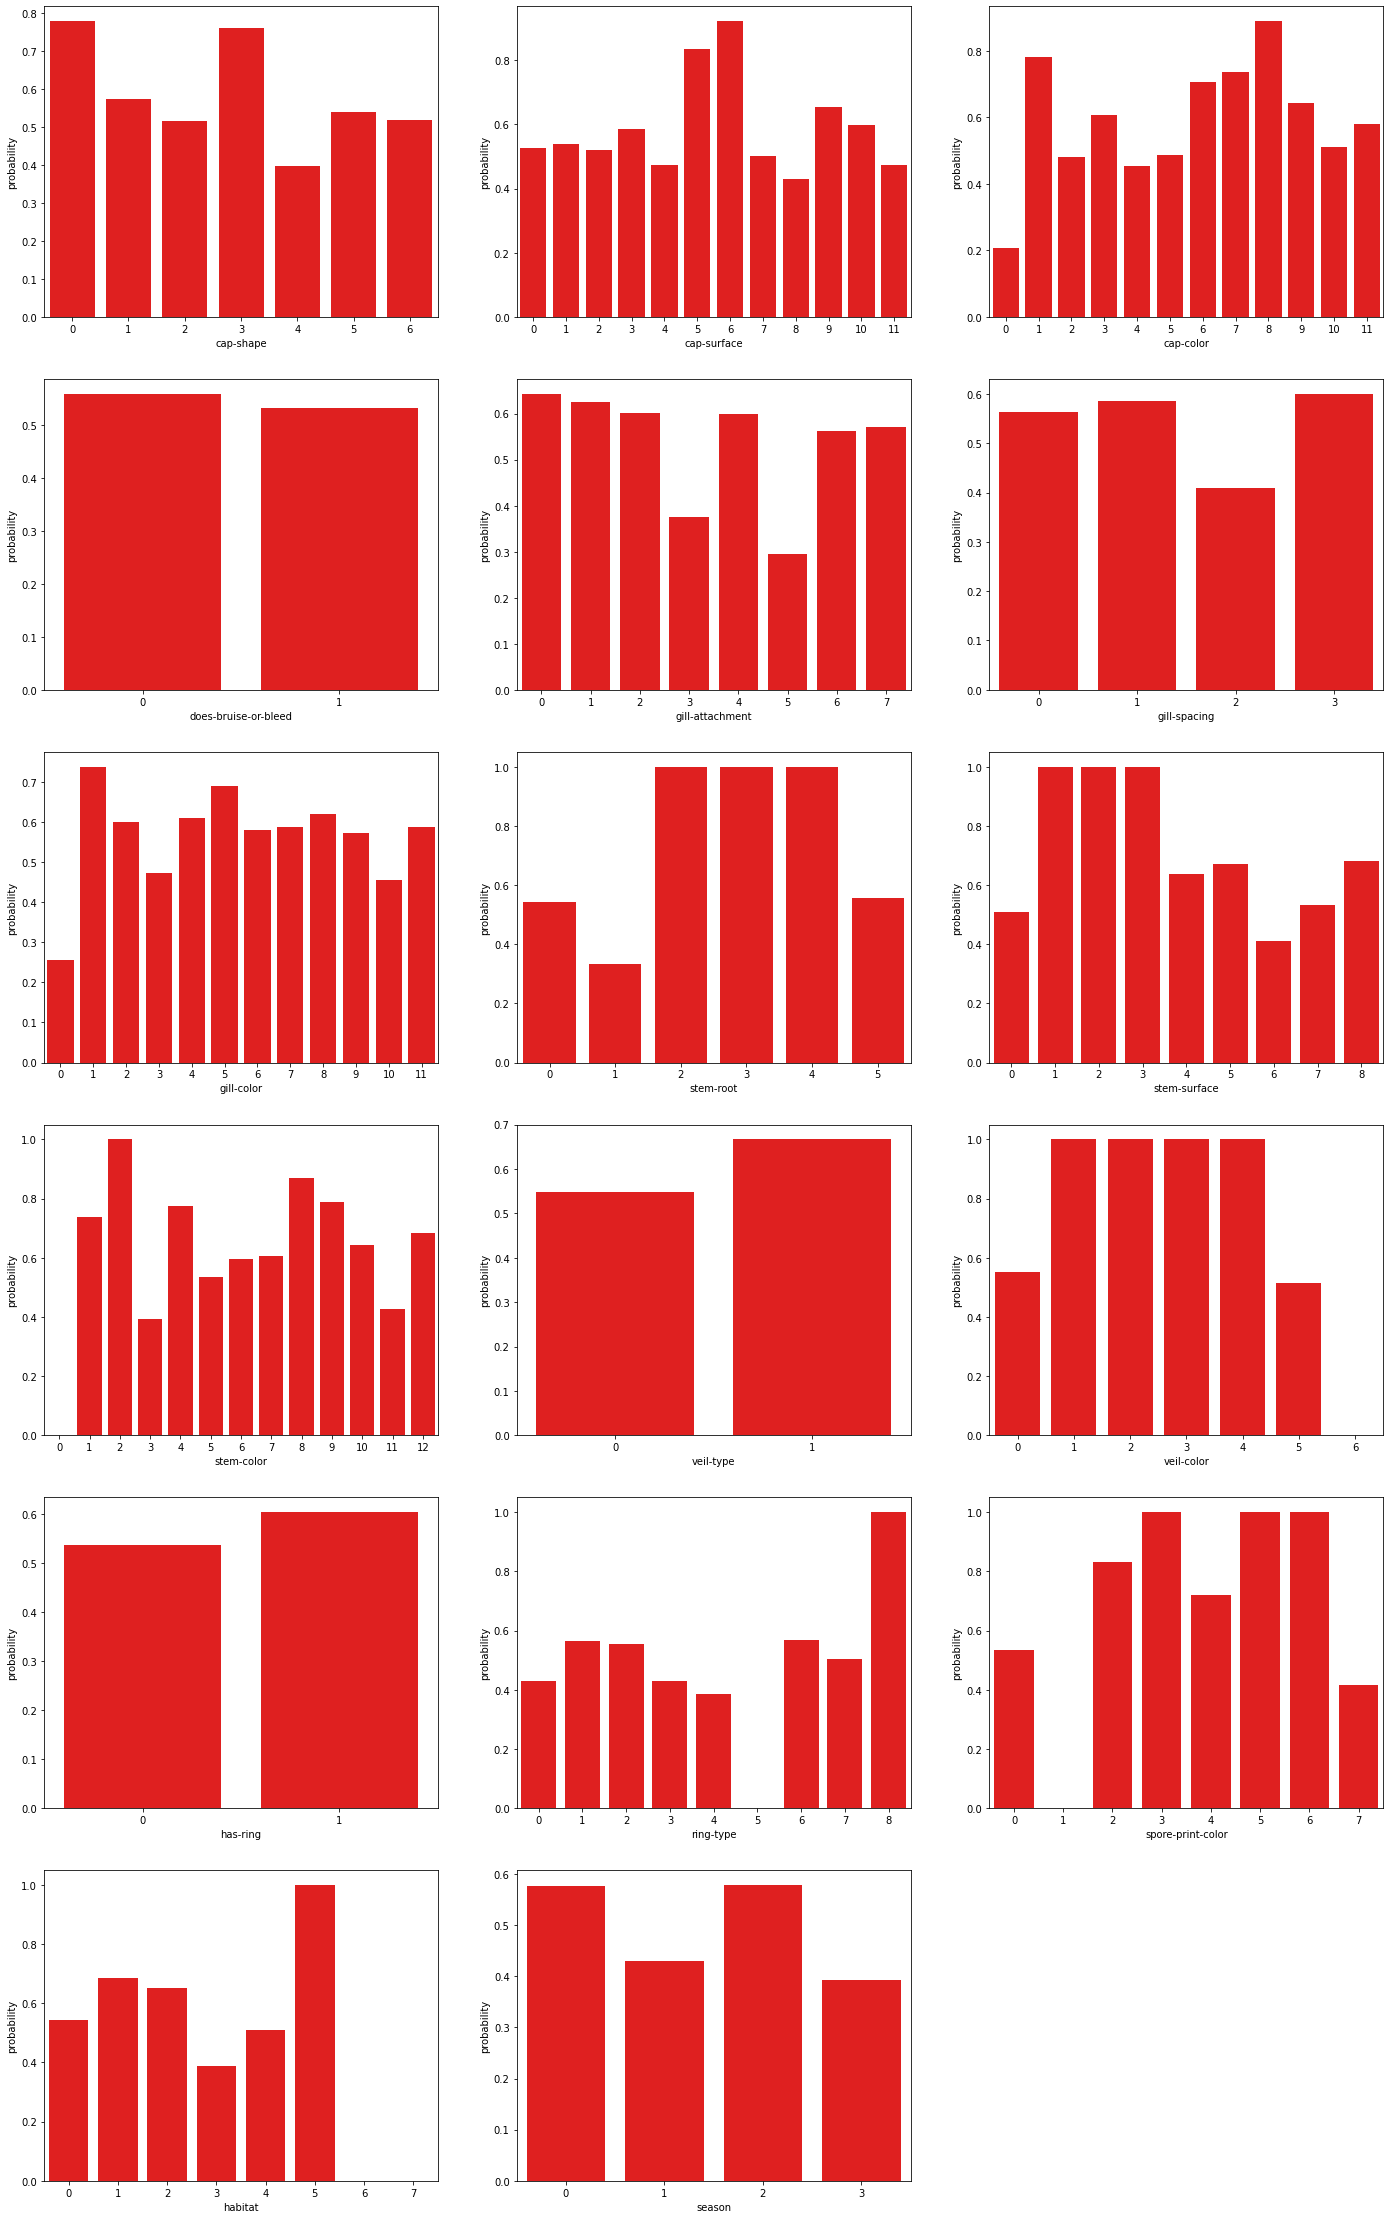

In [117]:
fig = plt.figure(figsize=(24, 40))
i=1
for col in df.columns:
  if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width':
        fig.add_subplot(6,3,i)
        p = cond_prob(col)
        sns.barplot(x = 'Feature value', y = 'probability', data=p, color='red').set(xlabel = col)
        i+=1
plt.show()

Tenendo conto che spesso e volentieri la probabilità è calcolata su un numero molto ristretto di istanze a disposizione rispetto alle totali, da tali grafici è comunque possibile mettere in luce come per alcuni valori di alcune feature la probabilità di velenosità sia alta.
Ad esempio nel caso della cap-shape e cap-surface si vede come per certe dimensionalità sia molto probabile che il fungo sia velenoso, così come per certi cap-color (8 = yellow).

***Amanita phalloides, il fungo più velenoso al mondo.***

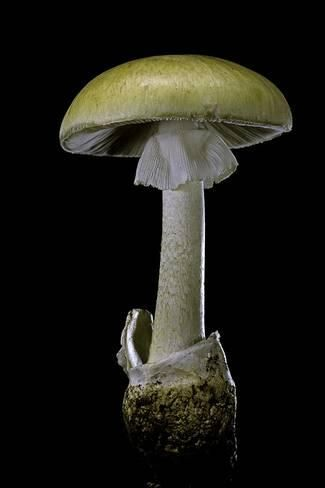

### 1.6 Conclusione

Sulla base dello studio effettuato sul dataset, non è possibile inferire molte implicazioni evidenti che leghino determinate features alla velenosità dei funghi. Le poche presenti riguardano sempre pochissimi dati, da cui non si può trarre una regola generica.

Pertanto, procediamo con tecniche di manipolazione delle features, prima di passare alla classificazione vera e propria.

## 2 Manipolazione dati

#### 2.1 Eliminazione valori ridondanti

Eliminiamo qui le istanze del dataset (x<sub>i</sub>, t<sub>i</sub>) ∈ (X, T) ridondanti.

In [118]:
shape_original = df.shape[0]
print("Dimensionalità del dataset totale: ", df.shape) #Togliamo i dati ridondanti 
df = df.drop_duplicates() 
print("Dimensionalità del dataset senza duplicati",df.shape)
diff = shape_original-df.shape[0]
print("Righe eliminate", diff)

Dimensionalità del dataset totale:  (61069, 21)
Dimensionalità del dataset senza duplicati (60923, 21)
Righe eliminate 146


#### 2.3 Splitting del dataset

In [119]:
X = df.drop(['class'], axis=1)
Y=df['class']
y = np.array(Y,dtype = 'float32')
x = np.array(X,dtype = 'float32')
print(x.shape, y.shape)

(60923, 20) (60923,)


In [120]:
x_train, x_test, y_train,y_test = train_test_split(x,y,train_size=0.9, random_state=50)

X_TRAIN=pd.DataFrame(x_train)
X_TEST=pd.DataFrame(x_test)

Abbiamo optato per una suddivisione 90% - 10%, quindi per un apprendimento su più dati.

###2.4 Features scaling

Applichiamo questo metodo per normalizzare l'intervallo delle variabili indipendenti. 

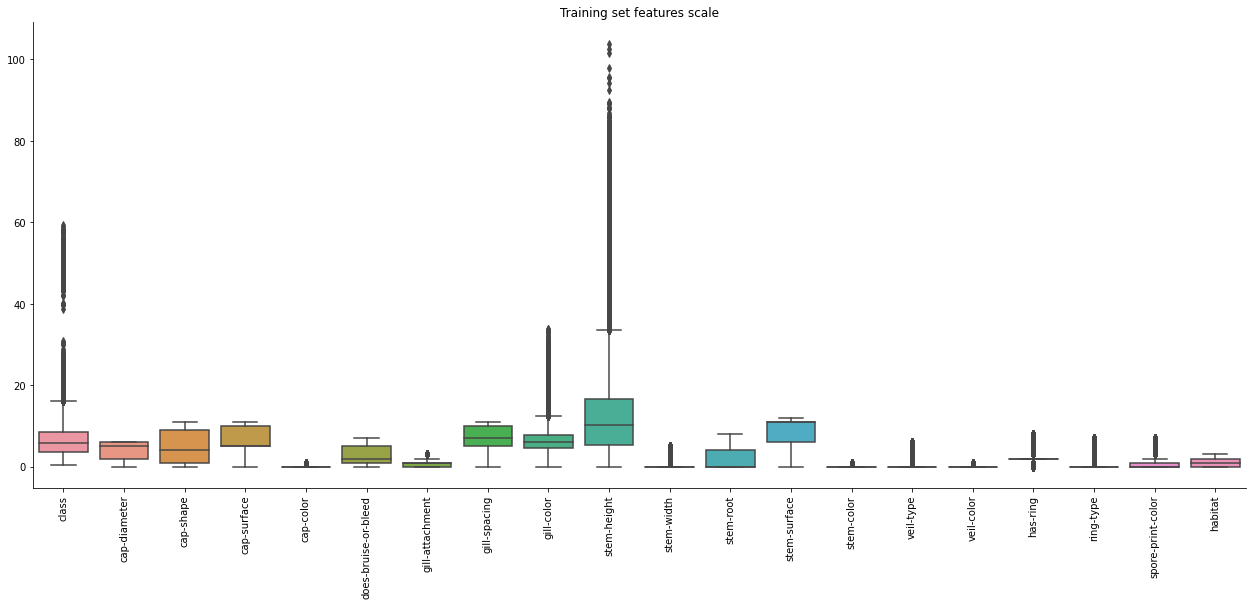

In [121]:
p = sns.factorplot(data=X_TRAIN , kind='box' , size=7, aspect=2.5).set(title='Training set features scale')
p.set_xticklabels(df.columns,rotation=90)

Come si vede nel grafico, i valori sono distribuiti su piccola scala.
Effettuiamo la funzione di scaling per vedere la differenza.

In [122]:
scaler = MinMaxScaler()

d = scaler.fit_transform(x_train)
g = scaler.transform(x_test)
names = X.columns
x_train_scaled = pd.DataFrame(d,columns = names)
x_test_scaled = pd.DataFrame(g, columns = names)

Abbiamo scelto lo scaler di tipo MinMaxScaler() in quanto, tra tutti quelli esistenti, proietta la scala nell'intervallo [0,1].

$$x_{scaled}=  \sigma * (max-min)+min $$

* $min,max$ = feature range
* $x_{scaled}$ = valore scalato
* $\sigma$ = deviazione standard </font>

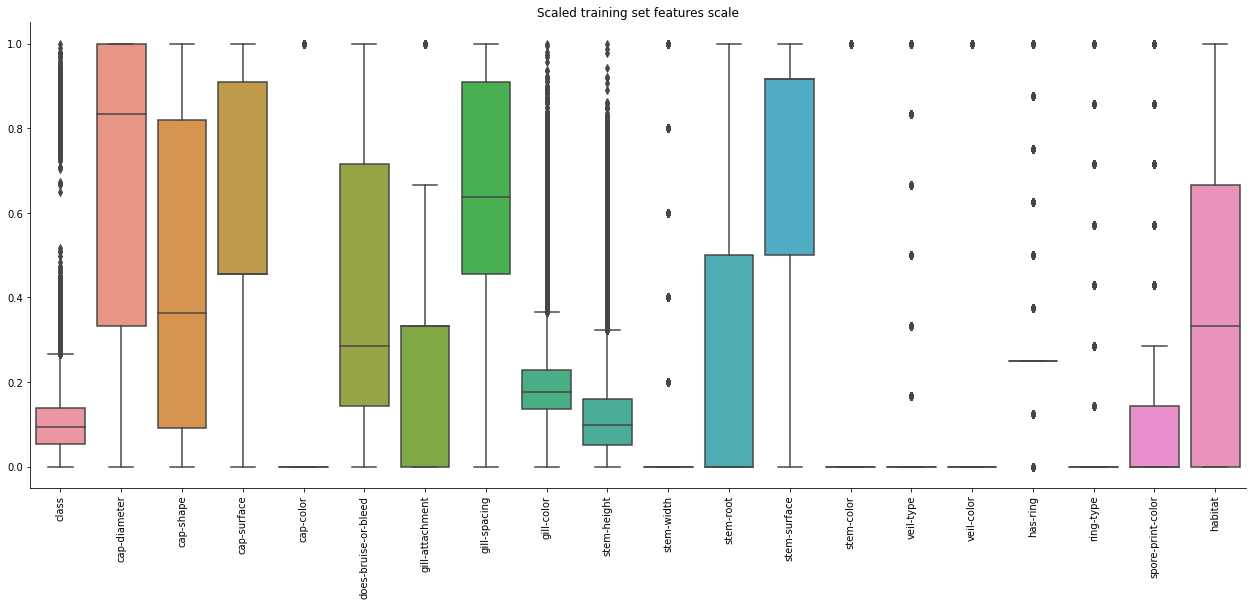

In [123]:
p = sns.factorplot(data=x_train_scaled , kind='box' , size=7, aspect=2.5).set(title='Scaled training set features scale')
p.set_xticklabels(df.columns,rotation=90)

Grazie a questa scala di valori diventa più chiara e meno variaible la distribuzione dei valori delle features.

Quindi scegliamo di lavorare con il dataset scalato.

In [124]:
x_train=x_train_scaled
x_test=x_test_scaled

### 2.5 Features Selection

Per effettuare la feature selection si può procedere in diversi modi; abbiamo deciso di focalizzarci su

- Analisi univariata (mutual information)
- Decision trees selection

#### 2.5.1 Mutual information

In questo procedimento vengono selezionate solo gli attributi più significativi ai fini della classificazione, scartando quelli meno importanti. Un metodo molto utilizzato è la Mutual Information la quale permette di stimare la dipendenza tra due variabili (un valore piccolo indica una minor dipendenza).

$$I(X;Y) = \sum\limits _y \sum\limits_x {p(x,y)} {log {\frac{p(x,y)}{p_X(x)p_Y(y)}}}$$


In [ ]:
features_before=x_train.columns

model = SelectKBest(mutual_info_classif)
model.fit(x_train, y_train)

x_train_selected_mi = model.transform(x_train) ##applicazione della FS ai dati
x_test_selected_mi = model.transform(x_test)

print("Attributi prima della feature selection: ", list(features_before))
print("# Attributi: ", len(features_before))
print("-----")
print("Attributi dopo la feature selection: ", list(x_train.columns[model.get_support()]))
print("# Attributi: ", len(x_train.columns[model.get_support()]))

Attributi prima della feature selection:  ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
# Attributi:  20
-----
Attributi dopo la feature selection:  ['cap-diameter', 'cap-surface', 'cap-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'ring-type', 'spore-print-color']
# Attributi:  10


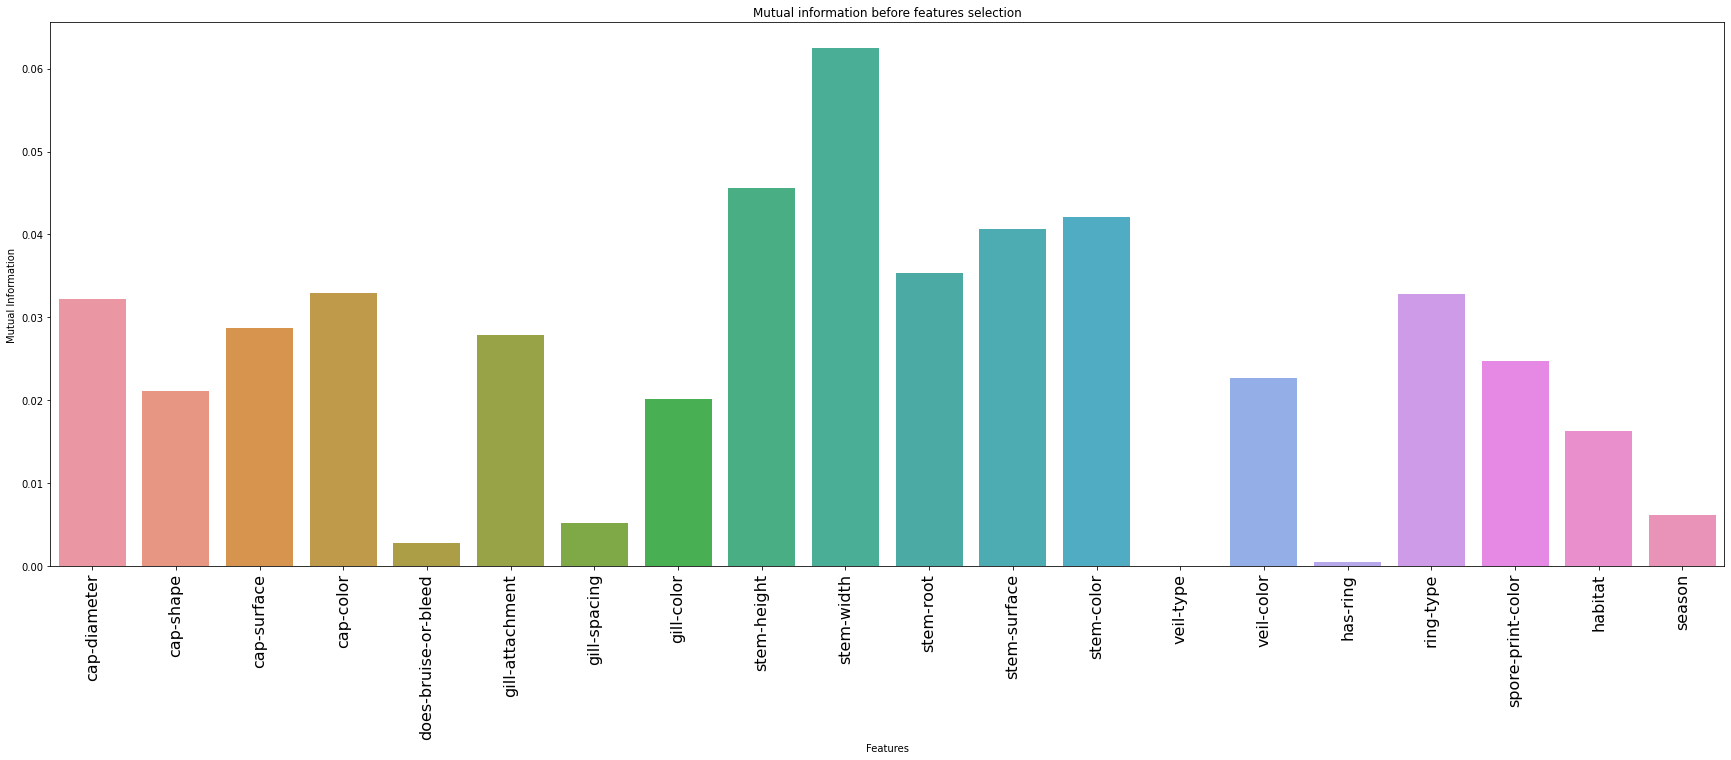

In [ ]:
mi_total = mutual_info_classif(x_train,y_train)
f, ax = plt.subplots(figsize=(30, 10))
ax = sns.barplot(x = x_train.columns , y=mi_total)
ax.set(xlabel='Features', ylabel='Mutual Information')
ax.set(title='Mutual information before features selection')
ax.set_xticklabels(x_train.columns,rotation=90,fontsize=16)
plt.show()

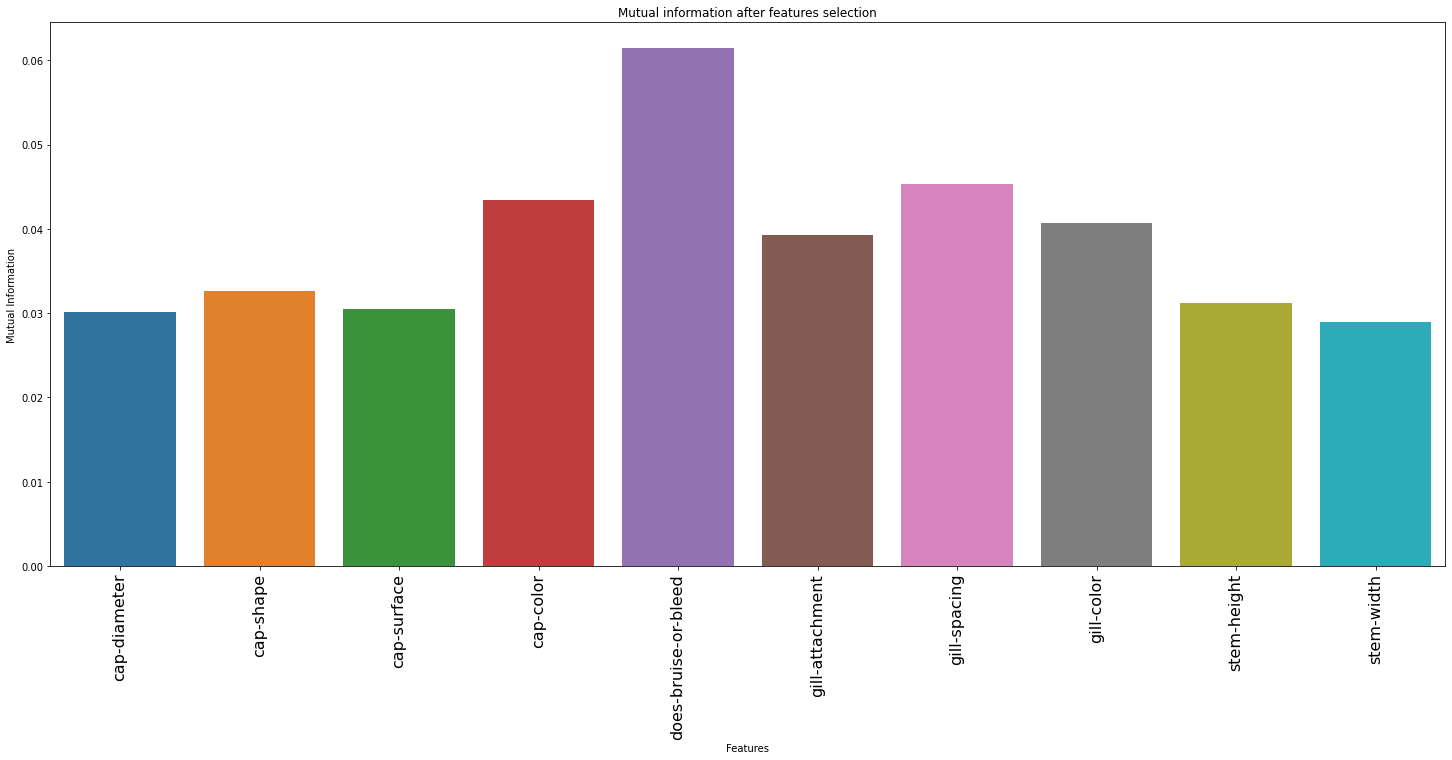

In [ ]:
mi = mutual_info_classif(x_train_selected_mi,y_train)
mi_df =pd.DataFrame(x_train_selected_mi, columns=x_train_scaled.columns[model.get_support()])
f, ax = plt.subplots(figsize=(25, 10))
ax = sns.barplot(x = mi_df.columns , y=mi)
ax.set(xlabel='Features', ylabel='Mutual Information')
ax.set(title='Mutual information after features selection')
ax.set_xticklabels(x_train.columns,rotation=90,fontsize=16)
plt.show()

La feature selection applicata con il metodo suddetto provvede quindi a selezionare gli attributi che contengono una quantità di informazioni maggiore.

#### 2.5.2 Decision trees selection

Questa tecnica di feature selection sfrutta la costruzione di alberi di decisione caratterizzati da una particolare splitting rule.

Viene selezionato un sottoinsieme di attributi, e per ognuno di essi vengono generate una serie di soglie in maniera randomica; tra esse, solo la migliore verrà scelta come effettiva regola di suddivisione. Questo di solito consente di ridurre un po' di più la varianza del modello, a scapito di un aumento leggermente maggiore del bias.

Andiamo a selezionare i k attributi di importanza più alta quindi.

Il criterio utilizzato per lo split è il valore dell'indice Gini

$$I_{G} = 1 - \sum\limits_i {f_{i}^2}$$

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

Utilizziamo la seguente libreria per graficare il decision tree: /usr/local/lib/python3.7/dist-packages/graphviz

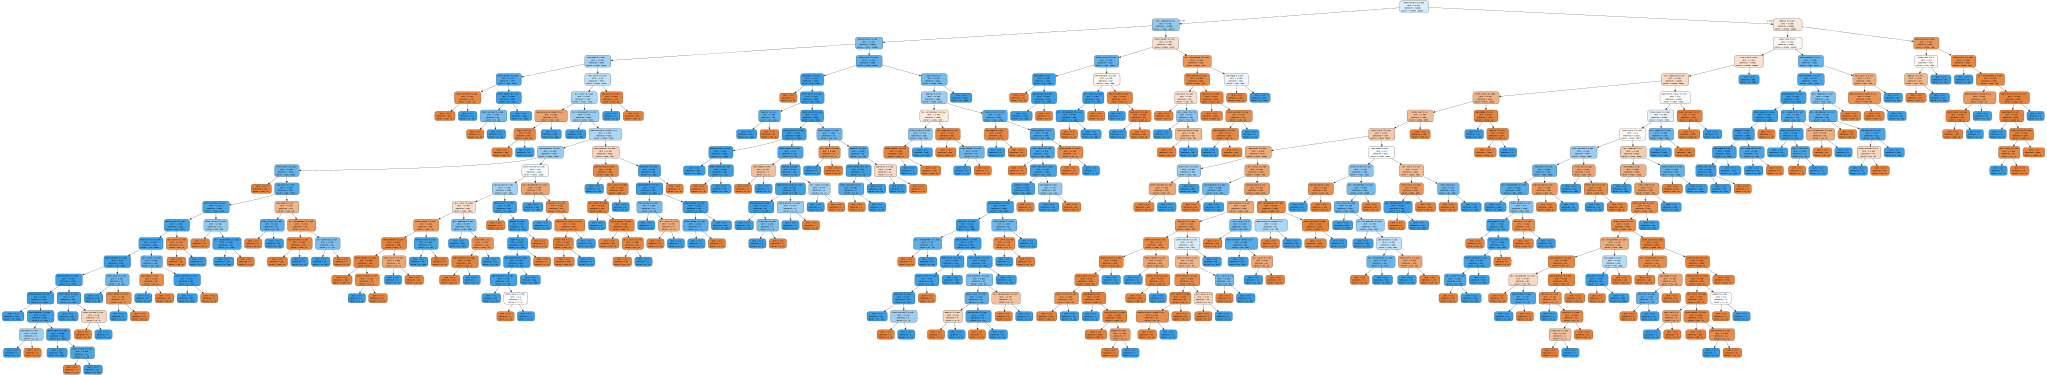

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.7/dist-packages/graphviz'

dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=x_train.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)
graph.render()
graph

Grafichiamo quindi l'importanza di ogni feature in ordine, così da effettuare la selezione.

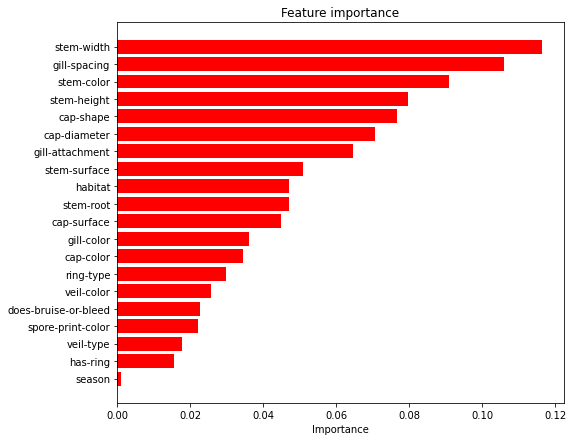

In [ ]:
features_list = x_train.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Feature Importance')
plt.draw()
plt.show()

La selezione viene effettuata sulla base del tuning di una threshold indicante quante features selezionare.

In [ ]:
parameters_dictionary_dt = {'max_features':np.arange(1,21,1)}
grid = GridSearchCV(estimator=dt, param_grid=parameters_dictionary_dt, cv=5)  #5-fold cross validation
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

max_features rappresenta proprio il numero di feature da considerare ogni volta per effettuare la classificazione.

Visualizziamo quante features conviene usare quindi sulla base del tuning effettuato.

In [ ]:
grid.best_params_

{'max_features': 18}

Selezioniamo le prime k features sulla base del tuning quindi

In [ ]:
x_train_selected_dt = pd.DataFrame()
x_test_selected_dt = pd.DataFrame()

count=0
for i in sorted_idx: 
  count=count+1
  if count > 20-grid.best_params_['max_features']:
   x_train_selected_dt[x_train.columns[i]] = x_train[x_train.columns[i]]
   x_test_selected_dt[x_test.columns[i]] = x_test[x_test.columns[i]]


print(x_test_selected_dt.shape,x_test_selected_dt.shape)

(6093, 18) (6093, 18)


Grafichiamo ora in ordine di importanza le feature rimaste.

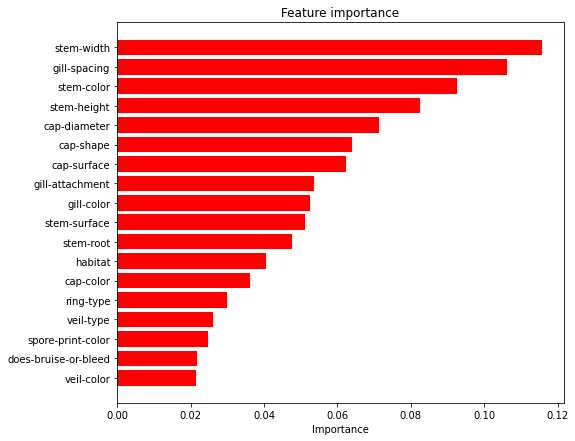

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train_selected_dt, y_train)

features_list = x_train_selected_dt.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Feature Importance')
plt.draw()
plt.show()

### 2.6 Features Extraction

Con questa tecnica i dati vengono mappati in uno spazio dimensionalmente più piccolo, il tutto cercando di mantenere la fedeltà dei dati.

Abbiamo scelto di utilizzare la principal component analisys (PCA).

####2.6.1 PCA

<strong>PCA</strong> (Principal Component Analisys)  permette di mappare i dati in uno spazio dimensionalmente più piccolo mantenendo la fedeltà degli stessi, dove per fedeltà si intende la distanza tra il punto e la sua proiezione. 

Mappando i dati in uno spazio più piccolo ma mantenendo la varianza dei dati si garantiscono stime più accurate con uno sforzo computazionale da parte del modello inferiore. 

In particolare si mappano i dati in uno spazio dimensionale $d^I$ definito dagli autovettori relativi ai massimi autovalori che garantiscono quindi maggiore varianza.

Andiamo a vedere l'informazione che viene data dalla totalità delle componenti, per capire il numero di componenti necessarie per inglobare la maggior parte dell'informazione.

In [ ]:
pca = PCA(n_components=20)
x_train_pca=pca.fit_transform(x_train) 
x_test_pca=pca.transform(x_test)
print("Original shape:",x_train.shape)
print('Shape of PCA data:',x_train_pca.shape)
print(("Explained Variance: %s") % (pca.explained_variance_ratio_))

Original shape: (54830, 20)
Shape of PCA data: (54830, 20)
Explained Variance: [0.15666918 0.11931273 0.08781029 0.08362275 0.08071679 0.07186863
 0.0660333  0.06335074 0.05158721 0.03936399 0.0353936  0.03381742
 0.03213545 0.02064095 0.01777397 0.01695629 0.0104937  0.00816618
 0.00288928 0.00139766]


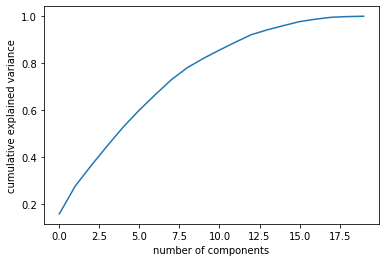

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

La maggior parte dell'informazione è inglobata nelle prime 10 componenti. Per questo abbiamo deciso di effettuare una features extraction con numero di componenti pari a 10, per avere un buon compromesso tra informazione e proiezione dello spazio delle features ottimale. 

In [ ]:
pca = PCA(n_components=10)
x_train_pca=pca.fit_transform(x_train) 
x_test_pca=pca.transform(x_test)
print("Original shape:",x_train.shape)
print('Shape of PCA data:',x_train_pca.shape)
print(("Explained Variance: %s") % (pca.explained_variance_ratio_))

Original shape: (54830, 20)
Shape of PCA data: (54830, 10)
Explained Variance: [0.15667252 0.11931526 0.08781204 0.08362436 0.08071835 0.07187007
 0.06603464 0.06335204 0.05158824 0.03936474]


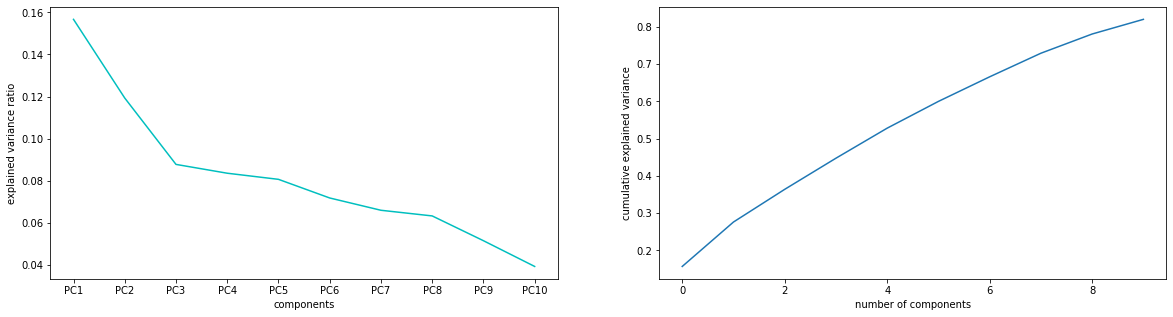

In [ ]:
#Variance ratio
pc_df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot("PC","var",  data=pc_df, color="c");
plt.ylabel('explained variance ratio');
plt.xlabel('components')

#Cumulative variance
plt.subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

##3 Classificatori

Andiamo ora ad effettuare uno studio sulla classificazione del testing set.
Ricordiamo che la matrice di confusione ha la seguente struttura:
$$
CM=
\begin{pmatrix}
TP & FP\\
FP & TN
\end{pmatrix}
$$
I punteggi derivanti dalla classificazione sono:

$$Accuracy = {\frac { TP + TN } {TP + FP + FN + TN}} $$

$$Recall = {\frac { TP } {TP + FN }} $$

$$Precision = {\frac { TP } {TP + FP }} $$

$$F1_{score} = {\frac { {2}   {Recall}   {Precision}} {Recall + Precision }} $$


Abbiamo realizzato alcune funzioni di utility da qui in avanti, per definire alcune operazioni ricorrenti in modo ottimizzato.

La funzione ***getStats()*** ritorna precision, recall ed accuracy arrotondate a due cifre decimali 

In [ ]:
#Definiamo la seguente funzione per calcolare le statistiche
def getStats(testing_set, predictions):
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  accuracy = accuracy_score(y_test, predictions)
  return round(precision,2),round(recall,2),round(accuracy,2)

La funzione ***classify()*** prende in input un modello, train set e test set, per ritornarne una versione addestrata. Oltre quindi eseguire il fit si occupa però anche di effettuare le predizioni del caso, andando a stampare la matrice di covarianza al fine di visionare le statistiche.

In [ ]:
#Definiamo la seguente funzione per agevolare la classificazione
def classify(classifier, training_set, testing_set):
  model = classifier.fit(training_set, y_train)
  predictions = model.predict(testing_set)
  
  score = model.score(testing_set, y_test)
  cm = metrics.confusion_matrix(y_test, predictions)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15);
  print(classification_report(y_test, predictions, target_names=['edible', 'poisonous']))

  return model

####3.0 Hyperparameter tuning

Per tuning si intende trovare il numero ideale dei parametri di un certo classificatore.

Definiamo la seguente funzione ***tune_up()*** per eseguire agevolmente il tuning nelle fasi successive. Ciò che fa è semplicemente un'esecuzione iterativa di diversi apprendimenti per ritornare una griglia contenente tutti i risultati.

A partire da essa potremo poi estrapolare i parametri migliori.

Per la fase di model selection abbiamo utilizzato il metodo 5-fold cross validation. Si tratta di una pratica che mescola il set di dati, lo divide in cinque set di cui uno viene preso per la convalida e altri quattro per l'addestramento. Il tutto ripetuto shiftando il primo in avanti ad ogni iterazione.

Il processo viene infatti ripetuto per tutti e 5 i set.

In [ ]:
fold= KFold(n_splits = 5, shuffle = True, random_state = 101)

In [ ]:
def tune_up(classifier,parameters_ranges,training_set):
  grid = GridSearchCV(estimator=classifier, param_grid=parameters_ranges, cv=fold)
  grid.fit(training_set, y_train)
  return grid

Seguono ora i classificatori. Per ognuno di essi abbiamo seguito il seguente schema:
- Definizione del dizionario contenente i parametri di tuning per il classificatore
- Tuning per trovare i parametri migliori tramite la funzione tune_up()

Una volta trovato il miglior set di parametri tramite la funzione lasciata commentata, abbiamo lasciato scritto solo il codice con la funzione classify con i parametri migliori.

Abbiamo scelto di far apprendere e predire ogni classificatore in quattro modalità:
- Base: su train set e test set base, quindi preso semplicemente senza alcuna tecnica di selezione delle features.
- MI: applicando la feature selection con mutual information
- DT: applicando la feature selection tramite decision tree
- PCA: applicando la feature extraction con principal component analysis 

### 3.1 Logistic Regression

La regressione logistica fa parte della famiglia degli approcci discriminativi in cui si assume direttamente che la probabilità condizionata $P(C_k | x)$ sia un generalized linear model (GLM), per poter derivare direttamente i coefficienti del modello tramite una stima ML.

La probabilità condizionata di appartenenza ad una classe è stimata dalla funzione sigmoide applicata a una combinazione lineare delle feature.
Per stimare i parametri del modello si stima quindi che gli elementi target del training set possano essere modellati tramite una distribuzione di Bernoulli:

$$P(t_i|x_i, w ) = p_i ^{t_i} (1-p_i ^{1-t_i})$$

Questo è il dizionario dei parametri utilizzati nel tune_up di ogni applicazione del classificatore.

In [ ]:
parameters_dictionary_lr = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                         'penalty':['l1', 'l2', 'elasticnet', 'none'],
                         'random_state':np.arange(0,101,10)}

#### 3.1.1 LR base

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_lr_base = tune_up(LogisticRegression(),parameters_dictionary_lr,x_train)
params_lr_base = grid_lr_base.best_params_
print(params_lr_base)

lr_base = classify(LogisticRegression(solver=params_lr_base.get('solver'), 
                                      penalty=params_lr_base.get('penalty'),
                                      random_state=params_lr_base.get('random_state')),x_train,x_test)
'''

{'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}


              precision    recall  f1-score   support

      edible       0.62      0.55      0.58      2653
   poisonous       0.68      0.74      0.71      3440

    accuracy                           0.66      6093
   macro avg       0.65      0.64      0.65      6093
weighted avg       0.65      0.66      0.65      6093



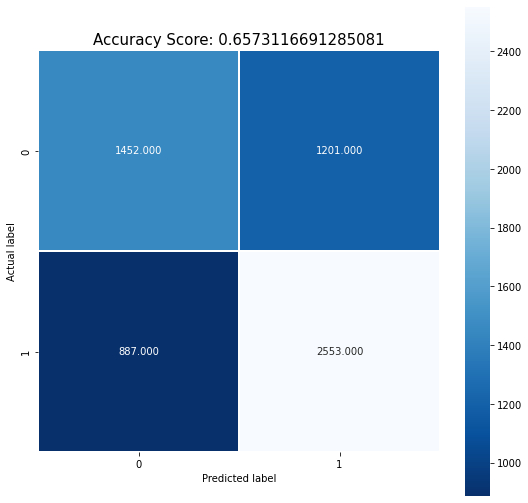

In [ ]:
lr_base = classify(LogisticRegression(solver='sag', 
                                      penalty='l2',
                                      random_state=0),x_train,x_test)

#### 3.1.2 LR con MI

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_lr_mi = tune_up(LogisticRegression(),parameters_dictionary_lr,x_train_selected_mi)
params_lr_mi = grid_lr_mi.best_params_
print(params_lr_mi)

lr_mi = classify(LogisticRegression(solver=params_lr_mi.get('solver'),
                                    penalty=params_lr_mi.get('penalty'),
                                    random_state=params_lr_mi.get('random_state')),x_train_selected_mi,x_test_selected_mi)
'''

{'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg'}


              precision    recall  f1-score   support

      edible       0.56      0.44      0.49      2653
   poisonous       0.63      0.74      0.68      3440

    accuracy                           0.61      6093
   macro avg       0.60      0.59      0.59      6093
weighted avg       0.60      0.61      0.60      6093



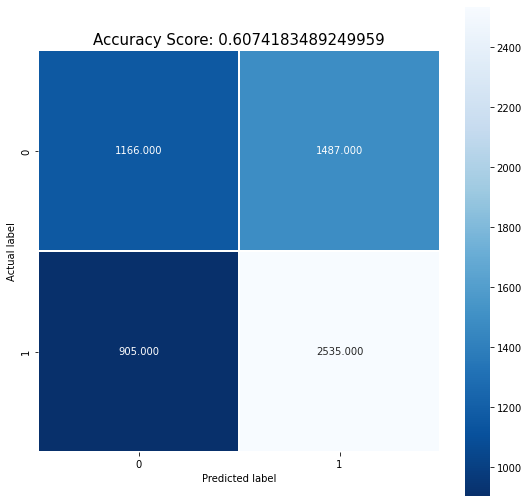

In [ ]:
lr_mi = classify(LogisticRegression(solver='newton-cg',
                                    penalty='none',
                                    random_state=0),x_train_selected_mi,x_test_selected_mi)

#### 3.1.3 LR con DT

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_lr_dt = tune_up(LogisticRegression(),parameters_dictionary_lr,x_train_selected_dt)
params_lr_dt = grid_lr_dt.best_params_
print(params_lr_dt)

lr_dt = classify(LogisticRegression(solver=params_lr_dt.get('solver'),
                                    penalty=params_lr_dt.get('penalty'),
                                    random_state=params_lr_dt.get('random_state')),x_train_selected_dt,x_test_selected_dt)
'''

{'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg'}


              precision    recall  f1-score   support

      edible       0.61      0.54      0.57      2653
   poisonous       0.67      0.73      0.70      3440

    accuracy                           0.65      6093
   macro avg       0.64      0.64      0.64      6093
weighted avg       0.64      0.65      0.64      6093



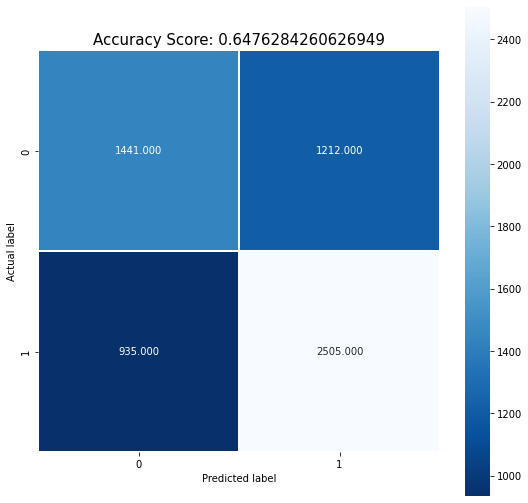

In [ ]:
lr_dt = classify(LogisticRegression(solver='newton-cg',
                                    penalty='none',
                                    random_state=0),x_train_selected_dt,x_test_selected_dt)

#### 3.1.4 LR con PCA

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_lr_pca = tune_up(LogisticRegression(),parameters_dictionary_lr,x_train_pca)
params_lr_pca = grid_lr_pca.best_params_
print(params_lr_pca)

lr_pca = classify(LogisticRegression(solver=params_lr_pca.get('solver'),
                                     penalty=params_lr_pca.get('penalty'), 
                                     random_state=params_lr_pca.get('random_state')),x_train_pca,x_test_pca)
'''

{'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}


              precision    recall  f1-score   support

      edible       0.59      0.39      0.47      2653
   poisonous       0.63      0.79      0.70      3440

    accuracy                           0.62      6093
   macro avg       0.61      0.59      0.58      6093
weighted avg       0.61      0.62      0.60      6093



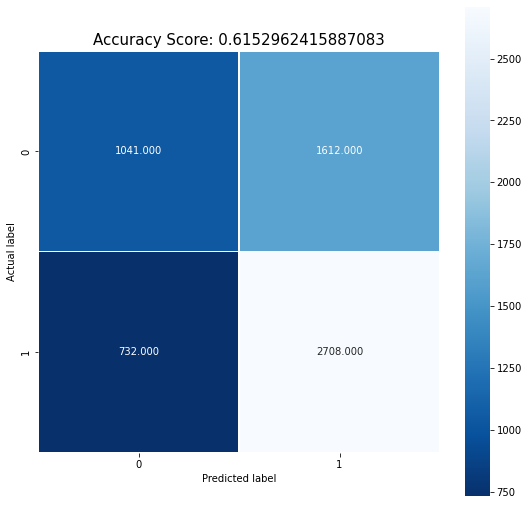

In [ ]:
lr_pca = classify(LogisticRegression(solver='liblinear',
                                     penalty='l1', 
                                     random_state=0),x_train_pca,x_test_pca)

### 3.2 Linear discriminant analysis

L'analisi discriminante lineare (LDA), nota anche come analisi discriminante normale o analisi della funzione discriminante, è una tecnica di riduzione della dimensionalità comunemente utilizzata per proiettare le caratteristiche di uno spazio di dimensione superiore in uno spazio di dimensione inferiore e risolvere problemi di classificazione supervisionati.

Questo è il dizionario dei parametri utilizzati nel tune_up di ogni applicazione del classificatore.

In [ ]:
parameters_dictionary_lda = {'solver':['svd', 'lsqr', 'eigen'],
                         'shrinkage':[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,'auto',None]}

#### 3.2.1 LDA base

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_lda_base = tune_up(LinearDiscriminantAnalysis(),parameters_dictionary_lda,x_train)
params_lda_base = grid_lda_base.best_params_
print(params_lda_base)

lda_base = classify(LinearDiscriminantAnalysis(solver=params_lda_base.get('solver'),
                                               shrinkage=params_lda_base.get('shrinkage')),x_train,x_test)
'''

{'shrinkage': 0.0, 'solver': 'lsqr'}


              precision    recall  f1-score   support

      edible       0.62      0.55      0.58      2653
   poisonous       0.68      0.74      0.71      3440

    accuracy                           0.66      6093
   macro avg       0.65      0.64      0.65      6093
weighted avg       0.65      0.66      0.65      6093



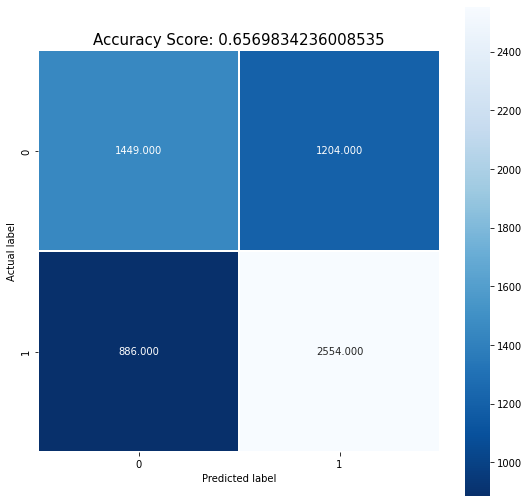

In [ ]:
lda_base = classify(LinearDiscriminantAnalysis(solver='lsqr',
                                               shrinkage=0.0),x_train,x_test)

#### 3.2.2 LDA con MI

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_lda_mi = tune_up(LinearDiscriminantAnalysis(),parameters_dictionary_lda,x_train_selected_mi)
params_lda_mi = grid_lda_mi.best_params_
print(params_lda_mi)

lda_mi = classify(LinearDiscriminantAnalysis(solver=params_lda_mi.get('solver'),
                                             shrinkage=params_lda_mi.get('shrinkage')),x_train_selected_mi,x_test_selected_mi)
'''

{'shrinkage': 0.5, 'solver': 'lsqr'}


              precision    recall  f1-score   support

      edible       0.58      0.44      0.50      2653
   poisonous       0.64      0.75      0.69      3440

    accuracy                           0.62      6093
   macro avg       0.61      0.60      0.60      6093
weighted avg       0.61      0.62      0.61      6093



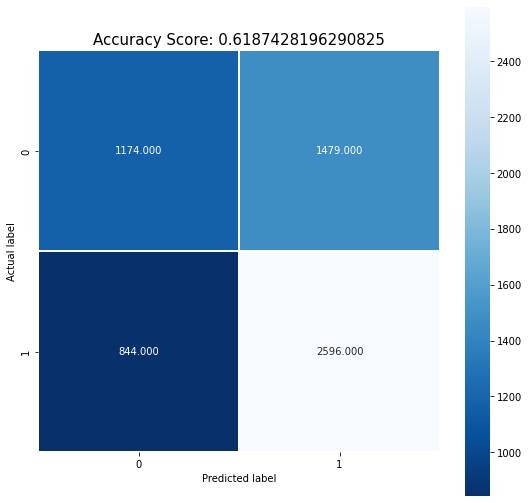

In [ ]:
lda_mi = classify(LinearDiscriminantAnalysis(solver='lsqr',
                                             shrinkage=0.5),x_train_selected_mi,x_test_selected_mi)

#### 3.2.3 LDA con DT

In [ ]:
'''
grid_lda_dt = tune_up(LinearDiscriminantAnalysis(),parameters_dictionary_lda,x_train_selected_dt)
params_lda_dt = grid_lda_dt.best_params_
print(params_lda_dt)

lda_dt = classify(LinearDiscriminantAnalysis(solver=params_lda_dt.get('solver'),
                                             shrinkage=params_lda_dt.get('shrinkage')),x_train_selected_dt,x_test_selected_dt)
'''

{'shrinkage': 0.6000000000000001, 'solver': 'lsqr'}


              precision    recall  f1-score   support

      edible       0.58      0.49      0.53      2653
   poisonous       0.65      0.73      0.69      3440

    accuracy                           0.63      6093
   macro avg       0.62      0.61      0.61      6093
weighted avg       0.62      0.63      0.62      6093



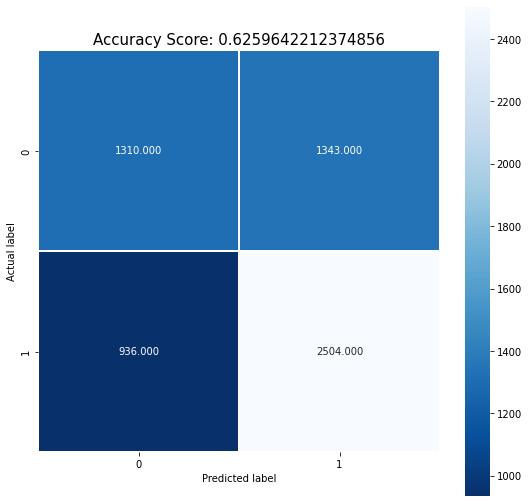

In [ ]:
lda_dt = classify(LinearDiscriminantAnalysis(solver='lsqr',
                                             shrinkage=0.6),x_train_selected_dt,x_test_selected_dt)

#### 3.2.4 LDA con PCA

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_lda_pca = tune_up(LinearDiscriminantAnalysis(),parameters_dictionary_lda,x_train_pca)
params_lda_pca = grid_lda_pca.best_params_
print(params_lda_pca)

lda_pca = classify(LinearDiscriminantAnalysis(solver=params_lda_pca.get('solver'),
                                              shrinkage=params_lda_pca.get('shrinkage')),x_train_pca,x_test_pca)
'''

{'shrinkage': 0.0, 'solver': 'lsqr'}


              precision    recall  f1-score   support

      edible       0.59      0.39      0.47      2653
   poisonous       0.63      0.79      0.70      3440

    accuracy                           0.61      6093
   macro avg       0.61      0.59      0.58      6093
weighted avg       0.61      0.61      0.60      6093



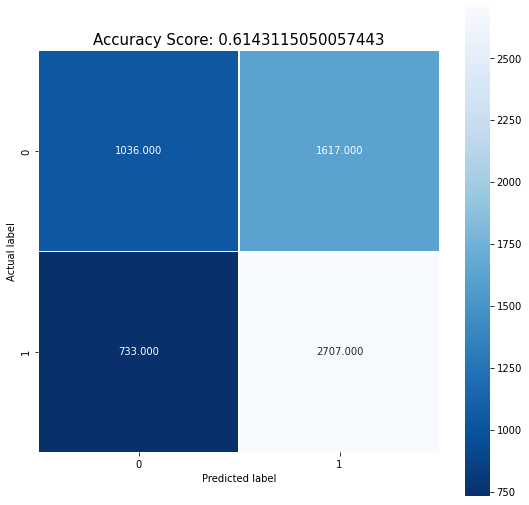

In [ ]:
lda_pca = classify(LinearDiscriminantAnalysis(solver='lsqr',
                                              shrinkage=0.0),x_train_pca,x_test_pca)

###3.3 Naive Bayes

Gaussian Naive Bayes è un algoritmo di classificazione probabilistica basato sull'applicazione del teorema di Bayes con forti ipotesi di indipendenza. Nel contesto della classificazione, l'indipendenza si riferisce all'idea che la presenza di un valore di una caratteristica non influenzi la presenza di un'altra (a differenza dell'indipendenza nella teoria della probabilità). Naive si riferisce all'uso di un presupposto che le caratteristiche di un oggetto sono indipendenti l'una dall'altra.

Il classificatore Naïve Bayes presuppone che il valore di una feature sia indipendente dal valore di qualsiasi altra feature.

Nonostante le ipotesi stringenti abbiamo scelto di applicare questo classificatore ugualmente per diversificare gli approcci. 

Questo è il dizionario dei parametri utilizzati nel tune_up di ogni applicazione del classificatore.

In [ ]:
parameters_dictionary_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

####3.3.1 NB base

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_nb_base = tune_up(GaussianNB(),parameters_dictionary_nb,x_train)
params_nb_base = grid_nb_base.best_params_
print(params_nb_base)

nb_base=classify(GaussianNB(var_smoothing=params_nb_base.get('var_smoothing')),x_train,x_test)
'''

{'var_smoothing': 1e-06}


              precision    recall  f1-score   support

      edible       0.57      0.52      0.55      2653
   poisonous       0.66      0.70      0.68      3440

    accuracy                           0.62      6093
   macro avg       0.61      0.61      0.61      6093
weighted avg       0.62      0.62      0.62      6093



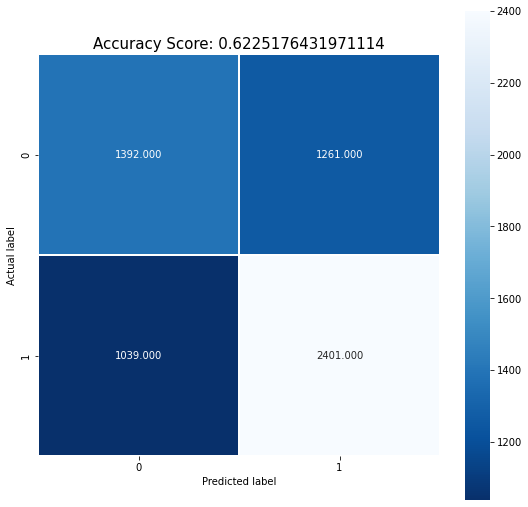

In [ ]:
nb_base=classify(GaussianNB(var_smoothing=1e-06),x_train,x_test)

####3.3.2 NB con MI

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_nb_mi = tune_up(GaussianNB(),parameters_dictionary_nb,x_train_selected_mi)
params_nb_mi = grid_nb_mi.best_params_
print(params_nb_mi)

nb_mi=classify(GaussianNB(var_smoothing=params_nb_mi.get('var_smoothing')),x_train_selected_mi,x_test_selected_mi)
'''

{'var_smoothing': 1.0}


              precision    recall  f1-score   support

      edible       0.59      0.40      0.48      2653
   poisonous       0.63      0.78      0.70      3440

    accuracy                           0.62      6093
   macro avg       0.61      0.59      0.59      6093
weighted avg       0.61      0.62      0.60      6093



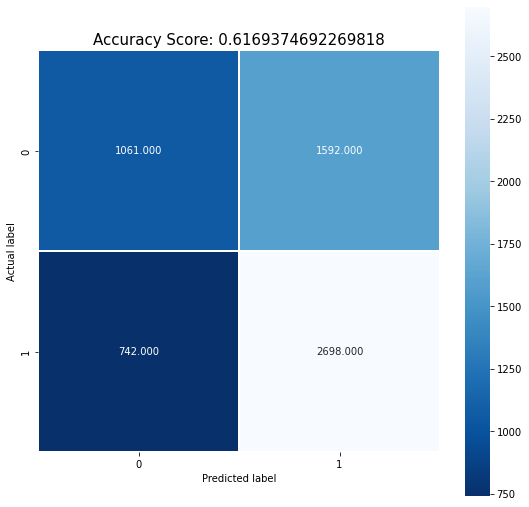

In [ ]:
nb_mi=classify(GaussianNB(var_smoothing=1.0),x_train_selected_mi,x_test_selected_mi)

####3.3.3 NB con DT

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_nb_dt = tune_up(GaussianNB(),parameters_dictionary_nb,x_train_selected_dt)
params_nb_dt = grid_nb_dt.best_params_
print(params_nb_dt)

nb_dt=classify(GaussianNB(var_smoothing=params_nb_dt.get('var_smoothing')),x_train_selected_dt,x_test_selected_dt)
'''

{'var_smoothing': 0.1}


              precision    recall  f1-score   support

      edible       0.54      0.56      0.55      2653
   poisonous       0.65      0.63      0.64      3440

    accuracy                           0.60      6093
   macro avg       0.59      0.59      0.59      6093
weighted avg       0.60      0.60      0.60      6093



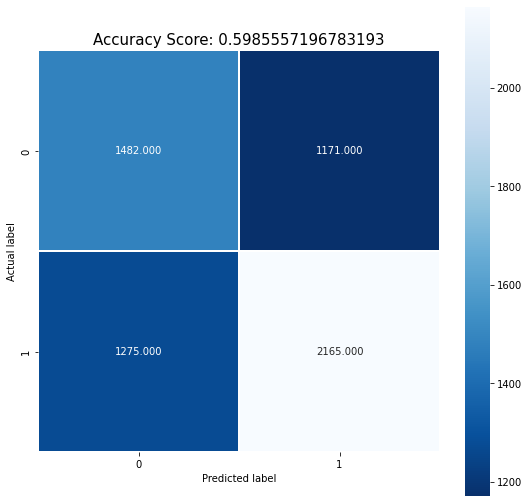

In [ ]:
nb_dt=classify(GaussianNB(var_smoothing=0.1),x_train_selected_dt,x_test_selected_dt)

####3.3.4 NB con PCA

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_nb_pca = tune_up(GaussianNB(),parameters_dictionary_nb,x_train_pca)
params_nb_pca = grid_nb_pca.best_params_
print(params_nb_pca)

nb_pca=classify(GaussianNB(var_smoothing=params_nb_pca.get('var_smoothing')),x_train_pca,x_test_pca)
'''

{'var_smoothing': 0.01}


              precision    recall  f1-score   support

      edible       0.57      0.46      0.51      2653
   poisonous       0.64      0.73      0.68      3440

    accuracy                           0.62      6093
   macro avg       0.61      0.60      0.60      6093
weighted avg       0.61      0.62      0.61      6093



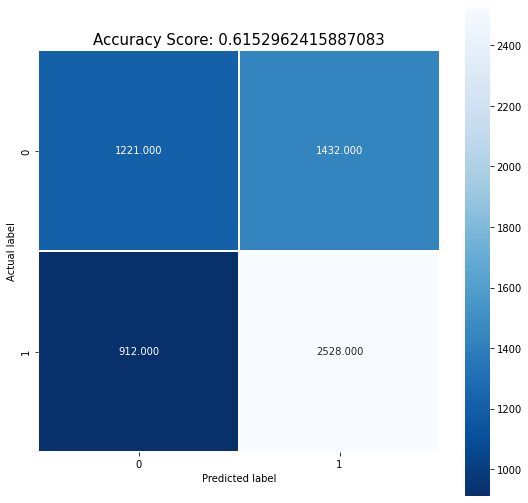

In [ ]:
nb_pca=classify(GaussianNB(var_smoothing=0.01),x_train_pca,x_test_pca)

###3.4 Random Forest

Random Forest è un modello che sfrutta un gruppo di Decision Tree messi insieme per raggiungere migliori performance di classificazione.

Un Decision Tree da solo, infatti, tende a soffrire di alta varianza (e quindi tendenza all’overfitting). Mettendo insieme più Decision Tree è possibile fare una media che risulta in un modello più robusto con migliori capacità di generalizzazione.

Questo è il dizionario dei parametri utilizzati nel tune_up di ogni applicazione del classificatore.

In [ ]:
parameters_dictionary_rf={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': np.arange(100,1001,100)}

####3.4.1 RF base

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_rf_base = tune_up(RandomForestClassifier(),parameters_dictionary_rf,x_train)
params_rf_base = grid_rf_base.best_params_
print(params_rf_base)

rf_base=classify(RandomForestClassifier(max_features=params_rf_base.get('max_features'),
                                        n_estimators=params_rf_base.get('n_estimators'),
                                        random_state=params_rf_base.get('random_state')),x_train,x_test)
'''

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1000}


              precision    recall  f1-score   support

      edible       0.98      1.00      0.99      2653
   poisonous       1.00      0.99      0.99      3440

    accuracy                           0.99      6093
   macro avg       0.99      0.99      0.99      6093
weighted avg       0.99      0.99      0.99      6093



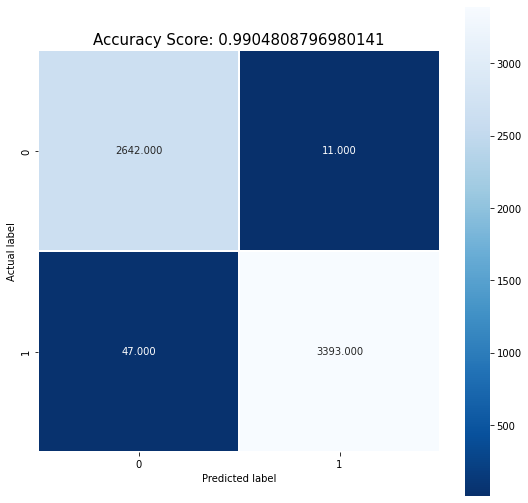

In [ ]:
rf_base=classify(RandomForestClassifier(max_features='sqrt',
                                        n_estimators=1000,
                                        bootstrap=True,
                                        max_depth=10,
                                        min_samples_leaf=4,
                                        min_samples_split=5),x_train,x_test)

####3.4.2 RF con MI

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_rf_mi = tune_up(RandomForestClassifier(),parameters_dictionary_rf,x_train_selected_mi)
params_rf_mi = grid_rf_mi.best_params_
print(params_rf_mi)

rf_mi=classify(RandomForestClassifier(max_features=params_rf_mi.get('max_features'),
                                      n_estimators=params_rf_mi.get('n_estimators'),
                                      random_state=params_rf_mi.get('random_state')),x_train_selected_mi,x_test_selected_mi)
'''

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1000}


              precision    recall  f1-score   support

      edible       0.91      0.99      0.95      2653
   poisonous       0.99      0.93      0.96      3440

    accuracy                           0.95      6093
   macro avg       0.95      0.96      0.95      6093
weighted avg       0.96      0.95      0.95      6093



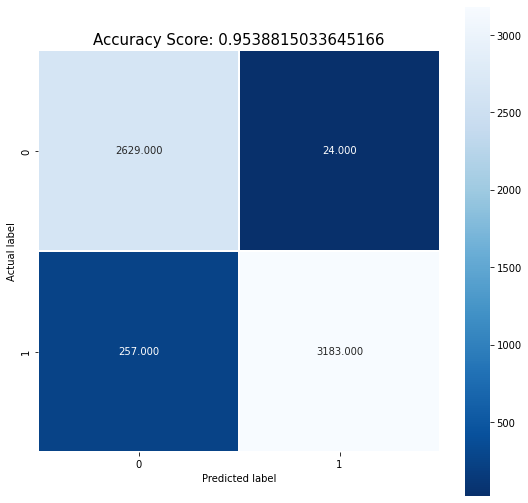

In [ ]:
rf_mi=classify(RandomForestClassifier(max_features='auto',
                                        n_estimators=1000,
                                        bootstrap=True,
                                        max_depth=10,
                                        min_samples_leaf=4,
                                        min_samples_split=5),x_train_selected_mi,x_test_selected_mi)

####3.4.3 RF con DT

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_rf_dt = tune_up(RandomForestClassifier(),parameters_dictionary_rf,x_train_selected_dt)
params_rf_dt = grid_rf_dt.best_params_
print(params_rf_dt)

rf_dt=classify(RandomForestClassifier(max_features=params_rf_dt.get('max_features'),
                                      n_estimators=params_rf_dt.get('n_estimators'),
                                      random_state=params_rf_dt.get('random_state')),x_train_selected_dt,x_test_selected_dt)
'''

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1000}


              precision    recall  f1-score   support

      edible       0.99      1.00      0.99      2653
   poisonous       1.00      0.99      0.99      3440

    accuracy                           0.99      6093
   macro avg       0.99      0.99      0.99      6093
weighted avg       0.99      0.99      0.99      6093



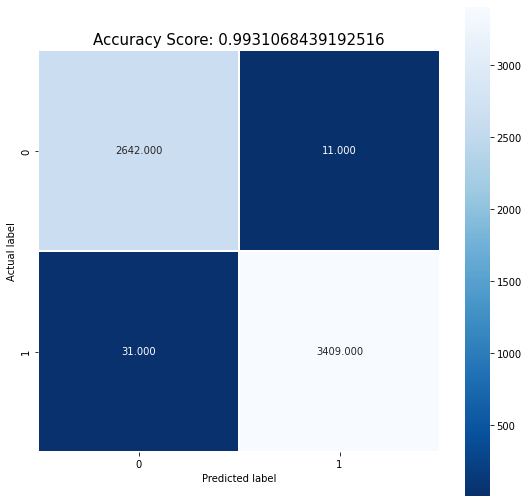

In [ ]:
rf_dt=classify(RandomForestClassifier(max_features='sqrt',
                                        n_estimators=1000,
                                        bootstrap=False,
                                        max_depth=10,
                                        min_samples_leaf=4,
                                        min_samples_split=5),x_train_selected_dt,x_test_selected_dt)

####3.4.4 RF con PCA

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_rf_pca = tune_up(RandomForestClassifier(),parameters_dictionary_rf,x_train_pca)
params_rf_pca = grid_rf_pca.best_params_
print(params_rf_pca)

rf_pca=classify(RandomForestClassifier(max_features=params_rf_pca.get('max_features'),
                                       n_estimators=params_rf_pca.get('n_estimators'),
                                       random_state=params_rf_pca.get('random_state')),x_train_pca,x_test_pca)
'''

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


              precision    recall  f1-score   support

      edible       0.96      0.89      0.92      2653
   poisonous       0.92      0.97      0.95      3440

    accuracy                           0.94      6093
   macro avg       0.94      0.93      0.93      6093
weighted avg       0.94      0.94      0.94      6093



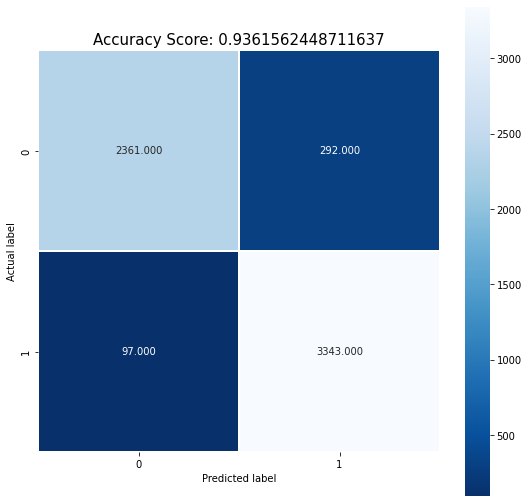

In [ ]:
rf_pca=classify(RandomForestClassifier(max_features='auto',
                                        n_estimators=100,
                                        bootstrap=True,
                                        max_depth=10,
                                        min_samples_leaf=4,
                                        min_samples_split=5),x_train_pca,x_test_pca)

###3.5 Rete Neurale (Multi-Layer Perceptron)



MLP è un modello di rete neurale che mappa insiemi di dati in ingresso in un insieme di dati in uscita. 
Ogni nodo utilizza una funzione di attivazione non lineare ad esempio una sigmoide che garantisce la "trasformazione" dell'output di un livello affinché possa essere immesso nel layer successivo e generare l'output finale. 
L'addestramento della rete neurale prevede una fase iniziale di forward propagation tramite la quale viene inserito nella rete il dato di imput e viene calcolata la relativa funzione di coso definita come:

$$C_0= (a_L - y )^2$$

con $a_L$ output del layer e $y$ valore che si dovrebbe ottenere.

A sua volta $a_L$ è ottenuto tramite la seguente formula:

$$ a_L = \sigma(a_{L-1} w_L + b_L)$$

Con $a_{L-1}$ output del layer precedente pesato per il peso $w_L$ del layer e il bias $b_L$ e $\sigma$ funzione di attivazione non lineare : 

$$\sigma = \frac{1}{1-e^{-x}}$$

![](https://github.com/msalvati1997/mushrooms_classificator/blob/main/sigma1.png?raw=1)

La seconda fase prevede la backpropagation, la rete viene quindi percorsa a ritroso, calcolando per ogni parametro la derivata della funzione costo questo permetterà di comprendere quali saranno gli aggiustamenti sui parametri che la rete dovrà compiere per minimizzare la relativa funzione di costo quindi fare in modo che il valore ottenuto sia quanto più vicino possibile al valore $y$.


![](https://github.com/msalvati1997/mushrooms_classificator/blob/main/rete.png?raw=1)

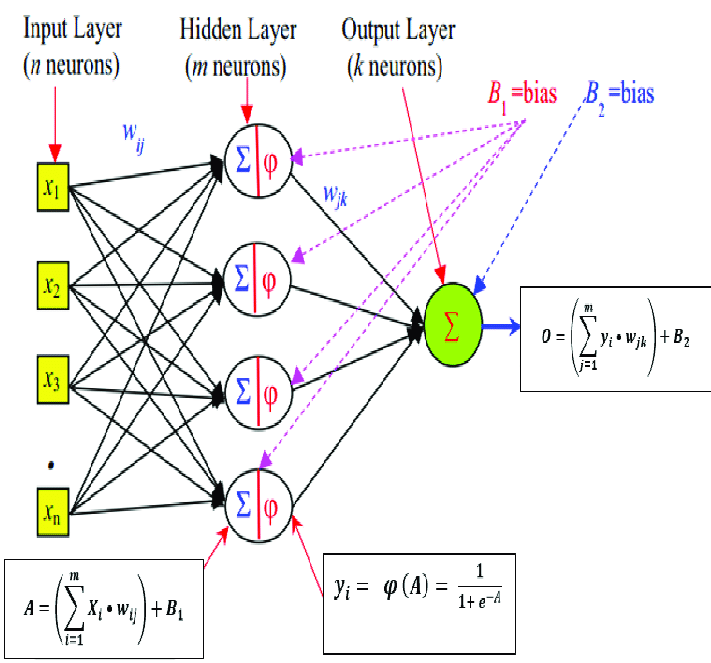

In [ ]:
MLPClassifier().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Questo è il dizionario dei parametri che abbiamo scelto di usare nel tune_up di ogni applicazione della rete neurale.

In [ ]:
parameters_dictionary_mlp = {'hidden_layer_sizes':[5,10,50,250],
                         'learning_rate_init':[0.001,0.05,0.1],
                         'solver':['sgd'],
                         'activation' : ['relu','sigmoid','linear']
                         }

####3.5.0 Percettrone multistrato

Andiamo a costruire un modello di percettrone multistrato standard (3 livelli). Questo ci ha permesso di analizzare l'addestramento della rete neurale.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(x_test, y_test))

Epoch 1/300
54/54 [==============================] - 1s 6ms/step - loss: 0.6809 - acc: 0.5616 - val_loss: 0.6625 - val_acc: 0.6081
Epoch 2/300
54/54 [==============================] - 0s 3ms/step - loss: 0.6520 - acc: 0.6272 - val_loss: 0.6387 - val_acc: 0.6448
Epoch 3/300
54/54 [==============================] - 0s 2ms/step - loss: 0.6300 - acc: 0.6593 - val_loss: 0.6188 - val_acc: 0.6704
Epoch 4/300
54/54 [==============================] - 0s 3ms/step - loss: 0.6102 - acc: 0.6813 - val_loss: 0.5996 - val_acc: 0.6780
Epoch 5/300
54/54 [==============================] - 0s 3ms/step - loss: 0.5915 - acc: 0.6941 - val_loss: 0.5820 - val_acc: 0.6913
Epoch 6/300
54/54 [==============================] - 0s 3ms/step - loss: 0.5738 - acc: 0.7078 - val_loss: 0.5656 - val_acc: 0.7110
Epoch 7/300
54/54 [==============================] - 0s 3ms/step - loss: 0.5574 - acc: 0.7244 - val_loss: 0.5501 - val_acc: 0.7228
Epoch 8/300
54/54 [==============================] - 0s 5ms/step - loss: 0.5422 - a

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                672       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


Abbiamo realizzato questa funzione al fine di vedere l'andamento della funzione loss all'aumentare delle epoche della fase di backpropagation.

In [ ]:
def plot_loss(history, num):

    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, num_epochs+1)

    plt.figure()
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return(loss_values, val_loss_values)

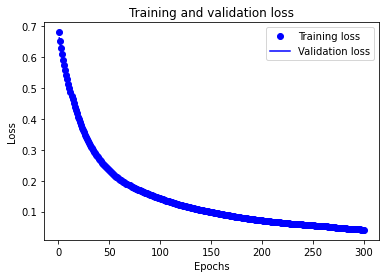

In [ ]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [ ]:
np.min(val_loss_values)

0.04053879529237747

In [ ]:
score = model.evaluate(x_train, y_train); print("Test loss:", score[0]); print("Test accuracy:", score[1])

1714/1714 [==============================] - 2s 1ms/step - loss: 0.0404 - acc: 0.9902
Test loss: 0.040449149906635284
Test accuracy: 0.9901514053344727


Vediamo l'andamento dell'accuracy all'aumentare delle epoche.

In [ ]:
def plot_accuracy(history, num):
    history_dict = history.history
    epochs = range(1, num_epochs+1)
    plt.figure()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return(acc_values, val_acc_values)

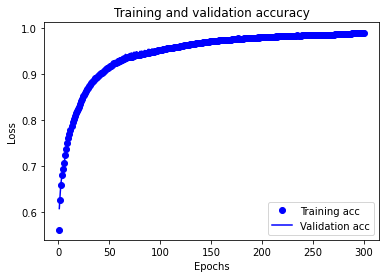

In [ ]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [ ]:
np.max(val_acc_values)

0.9916297197341919

####3.5.1 MLP base

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_mlp_base = tune_up(MLPClassifier() ,parameters_dictionary_mlp,x_train)
params_mlp_base = grid_mlp_base.best_params_
print(params_mlp_base)

mlp_base = classify(MLPClassifier(hidden_layer_sizes=params_mlp_base.get('hidden_layer_sizes'),
                       learning_rate_init=params_mlp_base.get('learning_rate_init'),
                       solver=params_mlp_base.get('solver'),
                       activation=params_mlp_base.get('activation')
                       ),x_train,x_test)
'''

{'activation': 'relu', 'hidden_layer_sizes': 250, 'learning_rate_init': 0.1, 'solver': 'sgd'}


              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      2653
   poisonous       1.00      1.00      1.00      3440

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093



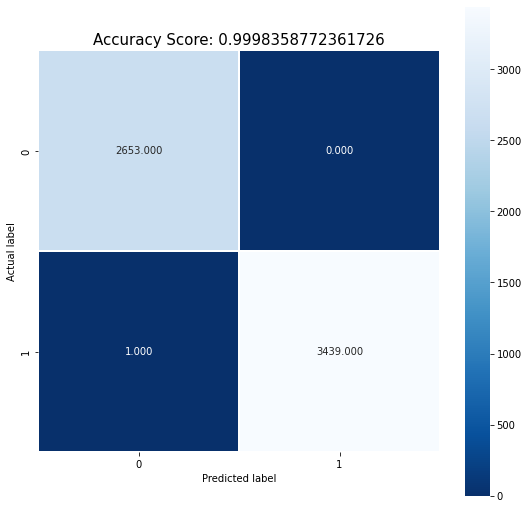

In [ ]:
mlp_base = classify(MLPClassifier(hidden_layer_sizes=250,
                       learning_rate_init=0.1,
                       solver='sgd',
                       activation='relu'
                       ),x_train,x_test)

####3.5.2 MLP con MI

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_mlp_mi = tune_up(MLPClassifier() ,parameters_dictionary_mlp,x_train_selected_mi)
params_mlp_mi = grid_mlp_mi.best_params_
print(params_mlp_mi)

mlp_mi = classify(MLPClassifier(hidden_layer_sizes=params_mlp_mi.get('hidden_layer_sizes'),
                       learning_rate_init=params_mlp_mi.get('learning_rate_init'),
                       solver=params_mlp_mi.get('solver'),
                       activation=params_mlp_mi.get('activation')
                       ),x_train_selected_mi,x_test_selected_mi)
'''

{'activation': 'relu', 'hidden_layer_sizes': 250, 'learning_rate_init': 0.1, 'solver': 'sgd'}


              precision    recall  f1-score   support

      edible       0.99      0.99      0.99      2653
   poisonous       0.99      0.99      0.99      3440

    accuracy                           0.99      6093
   macro avg       0.99      0.99      0.99      6093
weighted avg       0.99      0.99      0.99      6093



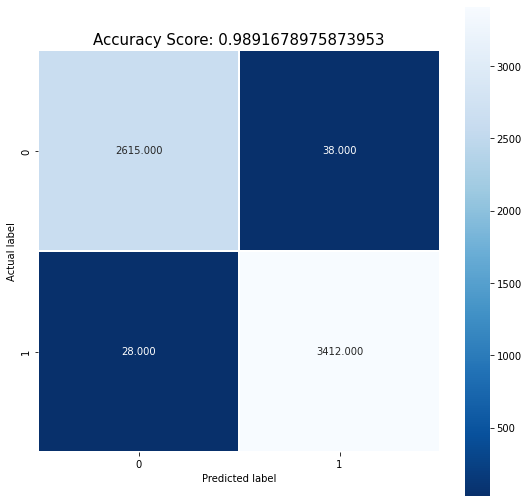

In [ ]:
mlp_mi = classify(MLPClassifier(hidden_layer_sizes=250,
                       learning_rate_init=0.1,
                       solver='sgd',
                       activation='relu'
                       ),x_train_selected_mi,x_test_selected_mi)

####3.5.3 MLP con DT

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_mlp_dt = tune_up(MLPClassifier() ,parameters_dictionary_mlp,x_train_selected_dt)
params_mlp_dt = grid_mlp_dt.best_params_
print(params_mlp_dt)

mlp_dt = classify(MLPClassifier(hidden_layer_sizes=params_mlp_dt.get('hidden_layer_sizes'),
                       learning_rate_init=params_mlp_dt.get('learning_rate_init'),
                       solver=params_mlp_dt.get('solver'),
                       activation=params_mlp_dt.get('activation')
                       ),x_train_selected_dt,x_test_selected_dt)
'''

{'activation': 'relu', 'hidden_layer_sizes': 250, 'learning_rate_init': 0.1, 'solver': 'sgd'}


              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      2653
   poisonous       1.00      1.00      1.00      3440

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093



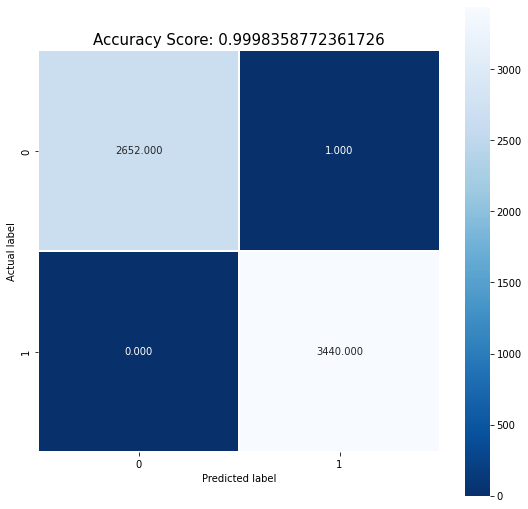

In [ ]:
mlp_dt = classify(MLPClassifier(hidden_layer_sizes=250,
                       learning_rate_init=0.1,
                       solver='sgd',
                       activation='relu'
                       ),x_train_selected_dt,x_test_selected_dt)

####3.5.4 MLP con PCA

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_mlp_pca = tune_up(MLPClassifier() ,parameters_dictionary_mlp,x_train_pca)
params_mlp_pca = grid_mlp_pca.best_params_
print(params_mlp_pca)

mlp_pca = classify(MLPClassifier(hidden_layer_sizes=params_mlp_pca.get('hidden_layer_sizes'),
                       learning_rate_init=params_mlp_pca.get('learning_rate_init'),
                       solver=params_mlp_pca.get('solver'),
                       activation=params_mlp_pca.get('activation')
                       ),x_train_pca,x_test_pca)
'''

{'activation': 'relu', 'hidden_layer_sizes': 250, 'learning_rate_init': 0.1, 'solver': 'sgd'}


              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      2653
   poisonous       1.00      1.00      1.00      3440

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093



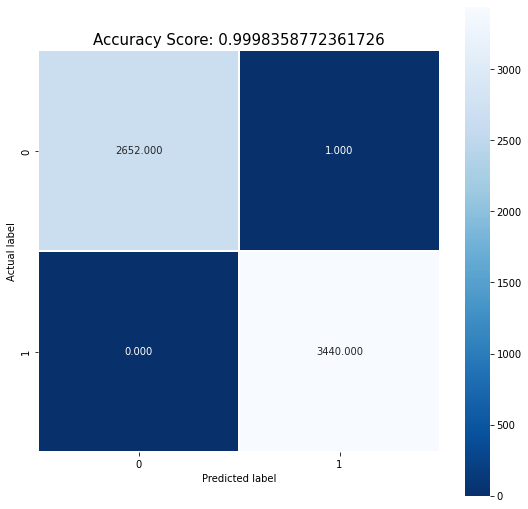

In [ ]:
mlp_pca = classify(MLPClassifier(hidden_layer_sizes=250,
                       learning_rate_init=0.1,
                       solver='sgd',
                       activation='relu'
                       ),x_train_pca,x_test_pca)

###3.6 SVM


Una support vector machine (SVM) è un modello di apprendimento supervisionato che utilizza algoritmi per problemi di classificazione binaria.

L'obiettivo di SVM è quello di trovare un iperpiano in uno spazio N-dimensionale (N — il numero di caratteristiche) che classifichi distintamente i punti dati.

Si cerca un piano che abbia il margine massimo, ovvero la distanza massima tra i punti dati di entrambe le classi. Massimizzare la distanza del margine fornisce un certo rinforzo in modo che i punti dati futuri possano essere classificati con maggiore sicurezza.

Il kernel utilizzato dall'SVM nel nostro caso è quello di tipo RBF.

Il kernel RBF è un kernel stazionario. È anche conosciuto come il kernel "esponenziale al quadrato"

$$k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$$

Questo è il dizionario dei parametri utilizzati nel tune_up di ogni applicazione del classificatore.

In [ ]:
parameters_dictionary_svm = {'gamma':np.arange(0.001,1,0.01),
                             'C':np.arange(10,101,10)}

#### 3.6.1 SVM base

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_svm_base = tune_up(SVC(),parameters_dictionary_svm,x_train)
params_svm_base = grid_svm_base.best_params_
print(params_svm_base)

svm_base=classify(SVC(gamma=params_svm_base.get('gamma'),
                      C=params_svm_base.get('C')),x_train,x_test)
'''

{'C': 100, 'gamma': 0.01}


              precision    recall  f1-score   support

      edible       0.80      0.83      0.81      2653
   poisonous       0.86      0.84      0.85      3440

    accuracy                           0.83      6093
   macro avg       0.83      0.83      0.83      6093
weighted avg       0.83      0.83      0.83      6093



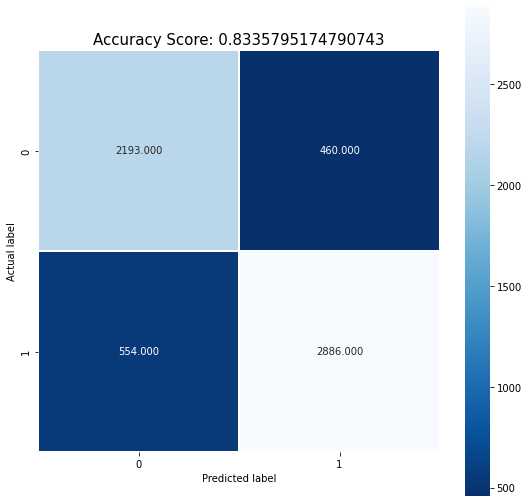

In [ ]:
svm_base=classify(SVC(gamma=0.01,
                      C=100,probability=True),x_train,x_test)

#### 3.6.2 SVM con MI

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_svm_mi = tune_up(SVC(),parameters_dictionary_svm,x_train_selected_mi)
params_svm_mi = grid_svm_mi.best_params_
print(params_svm_mi)

svm_mi=classify(SVC(gamma=params_svm_mi.get('gamma'),
                    C=params_svm_mi.get('C')),
                    x_train_selected_mi,
                    x_test_selected_mi)
'''

{'C': 100, 'gamma': 0.01}


              precision    recall  f1-score   support

      edible       0.63      0.64      0.63      2653
   poisonous       0.72      0.70      0.71      3440

    accuracy                           0.68      6093
   macro avg       0.67      0.67      0.67      6093
weighted avg       0.68      0.68      0.68      6093



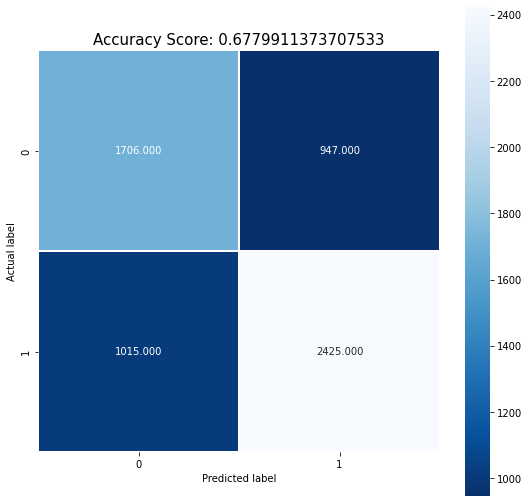

In [ ]:
svm_mi=classify(SVC(gamma=0.01,
                    C=100,probability=True),
                    x_train_selected_mi,
                    x_test_selected_mi)

#### 3.6.3 SVM con DT

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_svm_dt = tune_up(SVC(),parameters_dictionary_svm,x_train_selected_dt)
params_svm_dt = grid_svm_dt.best_params_
print(params_svm_dt)

svm_dt=classify(SVC(gamma=params_svm_dt.get('gamma'),
                    C=params_svm_dt.get('C')),
                    x_train_selected_dt,
                    x_test_selected_dt)
'''

{'C': 100, 'gamma': 0.01}


              precision    recall  f1-score   support

      edible       0.78      0.79      0.78      2653
   poisonous       0.83      0.83      0.83      3440

    accuracy                           0.81      6093
   macro avg       0.81      0.81      0.81      6093
weighted avg       0.81      0.81      0.81      6093



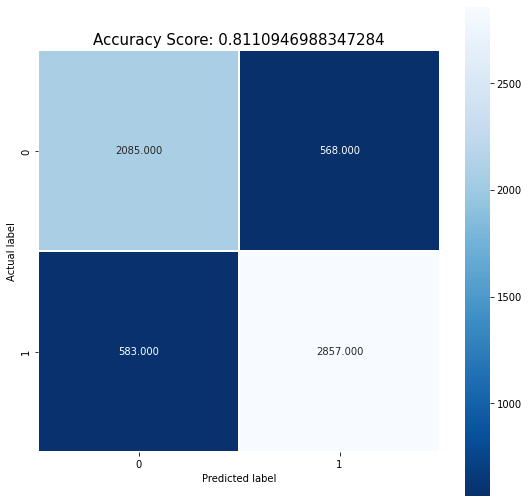

In [ ]:
svm_dt=classify(SVC(gamma=0.01,C=100,probability=True),
                    x_train_selected_dt,
                    x_test_selected_dt)

#### 3.6.4 SVM con PCA

Questo pezzo di codice lasciato commentato è quello che abbiamo utilizzato per trovare tramite tuning il miglior set di parametri.

In [ ]:
'''
grid_svm_pca = tune_up(SVC(),parameters_dictionary_svm,x_train_pca)
params_svm_pca = grid_svm_pca.best_params_
print(params_svm_pca)

svm_pca=classify(SVC(gamma=params_svm_pca.get('gamma'),
                    C=params_svm_pca.get('C')),
                    x_train_pca,
                    x_test_pca)
'''

{'C': 100, 'gamma': 0.01}


              precision    recall  f1-score   support

      edible       0.69      0.66      0.67      2653
   poisonous       0.75      0.77      0.76      3440

    accuracy                           0.72      6093
   macro avg       0.72      0.71      0.72      6093
weighted avg       0.72      0.72      0.72      6093



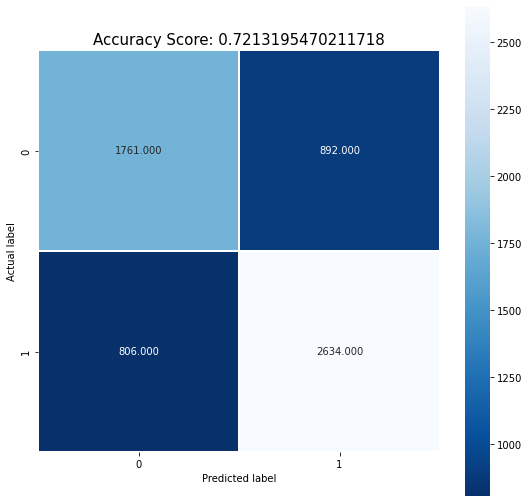

In [ ]:
svm_pca=classify(SVC(gamma=0.01,
                     C=100,
                     probability=True),x_train_pca,x_test_pca)

## 4 Confronti finali

In questo capitolo andiamo ad effettuare i confronti del caso, basandoci sui risultati ottenuti dai classificatori.

La seguente funzione permette di disegnare due grafici: uno che mette in luce la ROC curve, e l'altro che mette in luce la precision-recall curve.

In [ ]:
def plot_all(X_test, y_test, all_clfs, clf_names,title):
    plt.figure(figsize=(16,8))
    plt.suptitle(title, size=16)
    plt.subplot(121)
    roc_scores = plot_roc_curve(X_test, y_test, all_clfs, clf_names)
    plt.subplot(122)
    pr_scores = plot_pr_curve(X_test, y_test, all_clfs, clf_names)
    plt.show()
    return roc_scores, pr_scores

#plot tools
def plot_roc_curve(X_test, y_test, all_clfs, clf_names):
    roc_scores = dict()
#     plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.02])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    np.random.seed(0)
    y_test = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test.shape[1]

    for clf, clf_name in zip(all_clfs, clf_names):
        #two classes 
        if n_classes <= 2:
            probs = clf.predict_proba(X_test)
            preds = probs[:,1]
            fpr, tpr, _ = metrics.roc_curve(y_test, preds)
            roc_auc = metrics.auc(fpr, tpr)
            roc_scores[clf_name] = roc_auc
            plt.plot(fpr, tpr, 'b', label = '%s (AUC = %0.3f)' % (clf_name,roc_auc), c=np.random.rand(3,))
            plt.legend(loc = 'lower right')         
        #multi classes
        else:
            y_score = clf.predict_proba(X_test)
            # Compute ROC curve and ROC area for each class
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i],y_score[:,i])
                roc_auc[i] = metrics.auc(fpr[i], tpr[i])
            # Compute micro-average ROC curve and ROC area
            fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(),y_score.ravel())
            roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
            roc_scores[clf_name] = roc_auc["micro"]
            plt.plot(fpr["micro"], tpr["micro"], 'b', label = '%s (Micro AUC = %0.3f)' % 
                     (clf_name,roc_auc["micro"]), c=np.random.rand(3,))
            plt.legend(loc = 'lower right')        
    return roc_scores

def plot_pr_curve(X_test, y_test, all_clfs, clf_names):
    pr_scores = dict()
#     plt.figure(figsize=(10,8))
    plt.title('Precision-Recall Curve')
    plt.plot([0, 1], [1, 0],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.02])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    np.random.seed(0)
    y_test = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test.shape[1]
    
    for clf, clf_name in zip(all_clfs, clf_names):
        #two classes
        if n_classes <= 2:
            probs = clf.predict_proba(X_test)
            preds = probs[:,1]
            precision, recall, _ = metrics.precision_recall_curve(y_test, preds)
            pr_auc = metrics.auc(recall, precision)
            pr_scores[clf_name] = pr_auc
            plt.plot(recall, precision, 'b', label = '%s (AUC = %0.3f)' % (clf_name,pr_auc), c=np.random.rand(3,))
            plt.legend(loc = 'lower left')
        #multi classes
        else:
            y_score = clf.predict_proba(X_test)
            # Compute ROC curve and ROC area for each class
            precision = dict()
            recall = dict()
            pr_auc = dict()
            for i in range(n_classes):
                precision[i], recall[i], _ = metrics.precision_recall_curve(y_test[:,i],y_score[:,i])
                pr_auc[i] = metrics.auc(recall[i], precision[i])
            # Compute micro-average ROC curve and ROC area
            precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test.ravel(),y_score.ravel())
            pr_auc["micro"] = metrics.auc(recall["micro"], precision["micro"])  
            pr_scores[clf_name] = pr_auc["micro"]
            plt.plot(recall["micro"], precision["micro"], 'b', label = '%s (Micro AUC = %0.3f)' % 
                     (clf_name,pr_auc["micro"]), c=np.random.rand(3,))
            plt.legend(loc = 'lower left')
    return pr_scores

### 4.1 ROC CURVE E PR CURVE

In [ ]:
classificators_names = [type(lr_base).__name__,type(lda_base).__name__,type(nb_base).__name__,
                        type(rf_base).__name__,type(mlp_base).__name__,type(svm_base).__name__]

#### 4.1.1 Confronto base

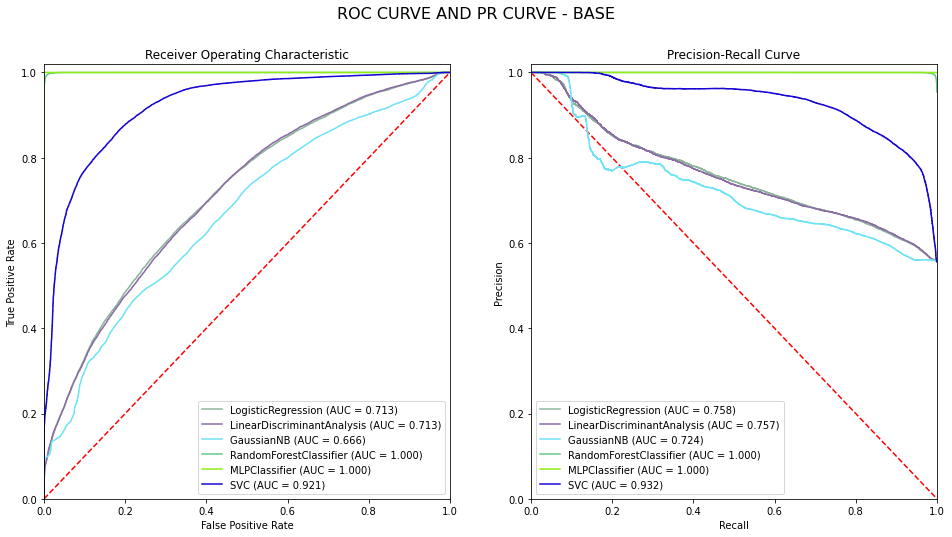

({'LogisticRegression': 0.7134501621489573,
  'LinearDiscriminantAnalysis': 0.7127793337512613,
  'GaussianNB': 0.6660769989907641,
  'RandomForestClassifier': 0.9998362308555281,
  'MLPClassifier': 0.9999999986545531,
  'SVC': 0.9213487331465551},
 {'LogisticRegression': 0.7584998473415532,
  'LinearDiscriminantAnalysis': 0.7574833331463678,
  'GaussianNB': 0.7242520024536043,
  'RandomForestClassifier': 0.9998679125117833,
  'MLPClassifier': 0.9999999989109439,
  'SVC': 0.9324762556693076})

In [ ]:
classificators_list = [lr_base,lda_base,nb_base,rf_base,mlp_base,svm_base]
plot_all(x_train, y_train, classificators_list, classificators_names,"ROC CURVE AND PR CURVE - BASE")

#### 4.1.2 Confronto MI

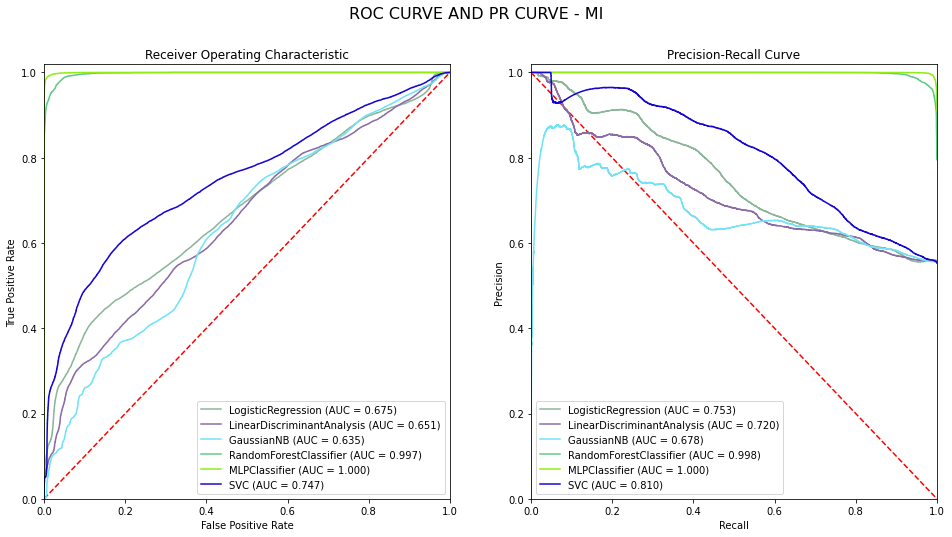

({'LogisticRegression': 0.6746749187662204,
  'LinearDiscriminantAnalysis': 0.6510979816929235,
  'GaussianNB': 0.6352130763297223,
  'RandomForestClassifier': 0.9971326359978823,
  'MLPClassifier': 0.9996296637172748,
  'SVC': 0.7469725567415867},
 {'LogisticRegression': 0.7531036220222992,
  'LinearDiscriminantAnalysis': 0.7199431333485516,
  'GaussianNB': 0.6781561301123442,
  'RandomForestClassifier': 0.9977136382872951,
  'MLPClassifier': 0.9997042610220731,
  'SVC': 0.8104794449104402})

In [ ]:
classificators_list = [lr_mi,lda_mi,nb_mi,rf_mi,mlp_mi,svm_mi]
plot_all(x_train_selected_mi, y_train, classificators_list, classificators_names,"ROC CURVE AND PR CURVE - MI")

#### 4.1.3 Confronto DT

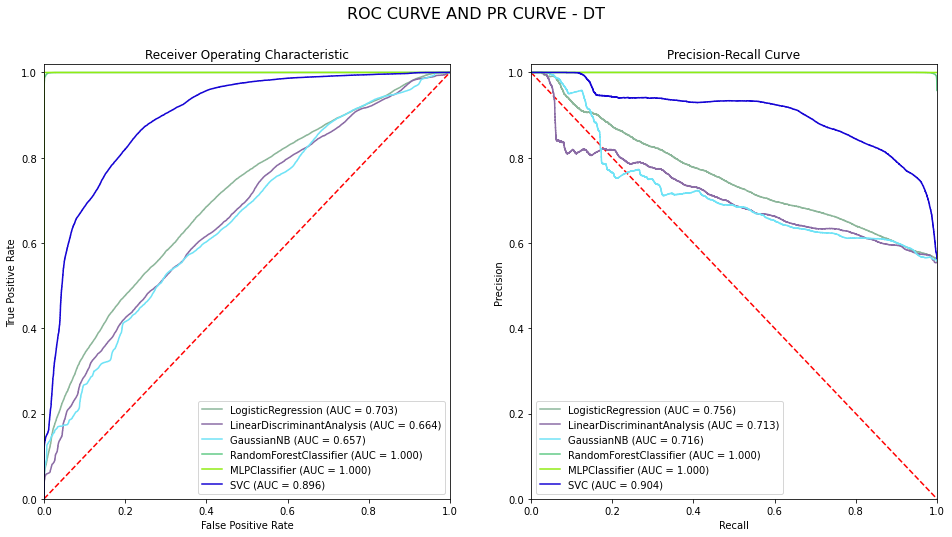

({'LogisticRegression': 0.7028374800115025,
  'LinearDiscriminantAnalysis': 0.6636345224167172,
  'GaussianNB': 0.6569660993229152,
  'RandomForestClassifier': 0.9999080884845974,
  'MLPClassifier': 0.9999999905818715,
  'SVC': 0.8957763213655723},
 {'LogisticRegression': 0.7555254853945244,
  'LinearDiscriminantAnalysis': 0.7128336204134773,
  'GaussianNB': 0.7163905086215678,
  'RandomForestClassifier': 0.9999257411950663,
  'MLPClassifier': 0.9999999923761401,
  'SVC': 0.903837970726499})

In [ ]:
classificators_list = [lr_dt,lda_dt,nb_dt,rf_dt,mlp_dt,svm_dt]
plot_all(x_train_selected_dt, y_train, classificators_list, classificators_names,"ROC CURVE AND PR CURVE - DT")

#### 4.1.4 Confronto PCA

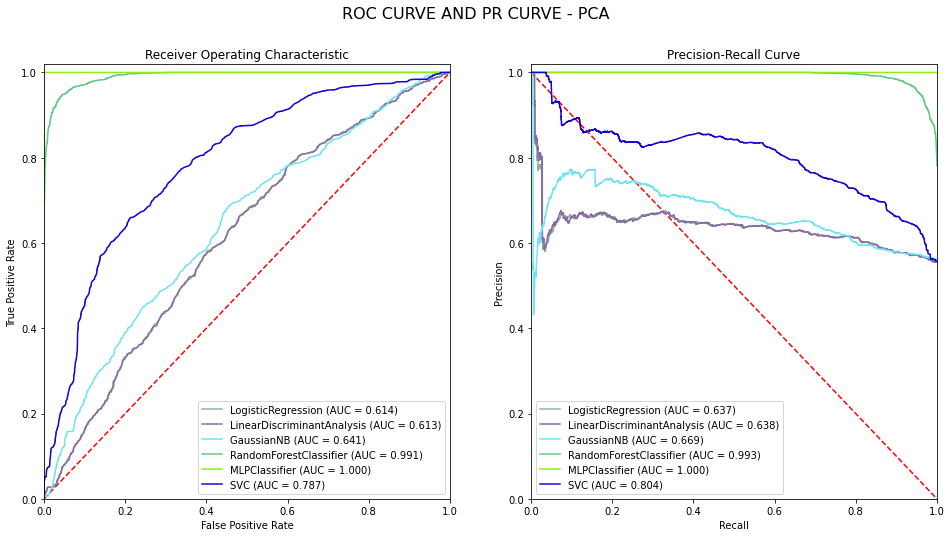

({'LogisticRegression': 0.6137063185588624,
  'LinearDiscriminantAnalysis': 0.6133759830857732,
  'GaussianNB': 0.6413867133370988,
  'RandomForestClassifier': 0.9913589505780965,
  'MLPClassifier': 0.9999993232401996,
  'SVC': 0.7874455180106261},
 {'LogisticRegression': 0.637425800333065,
  'LinearDiscriminantAnalysis': 0.6377969661127938,
  'GaussianNB': 0.6691214793182397,
  'RandomForestClassifier': 0.9932129570127735,
  'MLPClassifier': 0.9999994520224839,
  'SVC': 0.8035892615106279})

In [ ]:
classificators_list = [lr_pca,lda_pca,nb_pca,rf_pca,mlp_pca,svm_pca]
plot_all(x_train_pca, y_train, classificators_list, classificators_names,"ROC CURVE AND PR CURVE - PCA")

###4.2 Confronto delle metriche

 Modello | Precision | Recall | F1 | Accuracy | AUC 
 ------- | --------- | ------ | -- | -------- | --- 
Logistic Regression - base|0.68|0.74|0.71|0.65|0.71|
Logistic Regression - MI|0.63|0.74|0.68|0.60|0.67|
Logistic Regression - DT|0.67|0.73|0.70|0.64|0.70|
Logistic Regression - PCA|0.63|0.79|0.70|0.61|0.61|
Linear Discriminant Analysis - base|0.68|0.74|0.71|0.65|0.71|
Linear Discriminant Analysis - MI|0.64|0.75|0.69|0.61|0.65|
Linear Discriminant Analysis - DT|0.65|0.73|0.69|0.62|0.66|
Linear Discriminant Analysis - PCA|0.63|0.79|0.70|0.61|0.61|
Naive Bayes - base|0.66|0.70|0.68|0.62|0.66|
Naive Bayes - MI|0.63|0.78|0.70|0.61|0.73|
Naive Bayes - DT|0.65|0.63|0.64|0.59|0.65|
Naive Bayes - PCA|0.64|0.73|0.68|0.61|0.64|
Random Forest - base|1.00|0.99|0.99|0.99|1.00|
Random Forest - MI|0.99|0.93|0.96|0.95|0.99|
Random Forest - DT|1.00|0.99|0.99|0.99|1.00|
Random Forest - PCA|0.92|0.97|0.95|0.93|0.99|
Multi-Layer Perceptron - base|1.00|1.00|1.00|0.99|1.00|
Multi-Layer Perceptron - MI|0.99|0.99|0.99|0.98|1.00|
Multi-Layer Perceptron - DT|1.00|1.00|1.00|0.99|1.00|
Multi-Layer Perceptron - PCA|1.00|1.00|1.00|0.99|1.00|
Support Vector Machine - base|0.86|0.84|0.85|0.83|0.92|
Support Vector Machine - MI|0.72|0.70|0.71|0.67|0.74|
Support Vector Machine - DT|0.81|0.81|0.81|0.81|0.89|
Support Vector Machine - PCA|0.75|0.77|0.76|0.72|0.78|

###4.3 Conclusioni


Dal nostro studio si evince come:
- L'apprendimento e la predizione non sono adatti a modelli lineari data la bassa correlazione tra valore target ed attributi del dataset. Nei primi tre modelli presi in considerazione (Logistic regression, Linear discriminant analysis e Naive Bayes) infatti i valori delle metriche tendono a rimanere piuttosto bassi. Sono proprio i modelli non lineari usati successivamente infatti (Random Forest, Multi Layer Perceptron e Support Vector Machines) a brillare per le prestazioni. A fronte infatti di tempi di apprendimento molto più lunghi dovuti alla complessità della non linearità, permettono di apprezzare dei valori delle metriche molto migliori.

- In generale la feature selection non porta ad un aumento del valore delle metriche. Tale processo migliora i tempi di apprendimento (elevati per via della mole di dati) ma riduce la quantità di dati a disposizione.
Ogni feature risulta quindi importante nel processo di apprendimento dei modelli e nelle successive predizioni, non è conveniente scartarle.

- Anche la feature extraction tramite principal component analysis non porta ad un miglioramento nell'efficacia delle predizioni, e ciò è da imputare proprio al fatto che andare a diminuire la risoluzione di feature che risultano importanti allo stesso modo non è utile in questo caso. Tanto vale quindi risparmiare i tempi di computazione necessari ad attuare PCA e lavorare direttamente sul dataset intero.

Anche se gli esperti hanno stabilito che non esiste un semplice insieme di regole per determinare se un fungo è commestibile o meno, sembra che con i nostri risultati ci si possa avvicinare abbastanza. Tuttavia, è importante tenere presente che questi risultati si applicano solo a questo set di dati.

Autori
======================= 
- [Martina Salvati](https://github.com/msalvati1997)   (0292307)
- [Matteo Ferretti](https://github.com/IronMatt97)    (0300049)